In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import matplotlib.ticker as mtick

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
import shap
%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


/Users/JorgeJimenez/miniconda3/envs/NLP310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Vamos a examinar la estructura de cada archivo CSV disponible
import os
import pandas as pd

# Listar todos los archivos CSV
csvs = [f for f in os.listdir() if f.endswith(".csv")]
print(f"Se encontraron {len(csvs)} archivos CSV:")

# Leer y mostrar la cabecera de cada archivo
for csv_file in csvs:
    print(f"\n{'='*50}")
    print(f"📄 Archivo: {csv_file}")
    print(f"{'='*50}")

    try:
        # Leer solo las 3 primeras filas para mostrar la estructura
        df = pd.read_csv(csv_file, nrows=3)

        # Mostrar información sobre las columnas
        print(f"\nColumnas ({len(df.columns)}):")
        for i, col in enumerate(df.columns):
            print(f"  {i+1}. {col}")

        # Mostrar tipos de datos
        print("\nTipos de datos:")
        for col, dtype in df.dtypes.items():
            print(f"  - {col}: {dtype}")

        # Mostrar muestra de datos
        print("\nPrimeras 3 filas:")
        print(df.head(3))

    except Exception as e:
        print(f"❌ Error al leer {csv_file}: {e}")

Se encontraron 18 archivos CSV:

📄 Archivo: NBA_PBP_2017-18.csv

Columnas (40):
  1. URL
  2. GameType
  3. Location
  4. Date
  5. Time
  6. WinningTeam
  7. Quarter
  8. SecLeft
  9. AwayTeam
  10. AwayPlay
  11. AwayScore
  12. HomeTeam
  13. HomePlay
  14. HomeScore
  15. Shooter
  16. ShotType
  17. ShotOutcome
  18. ShotDist
  19. Assister
  20. Blocker
  21. FoulType
  22. Fouler
  23. Fouled
  24. Rebounder
  25. ReboundType
  26. ViolationPlayer
  27. ViolationType
  28. TimeoutTeam
  29. FreeThrowShooter
  30. FreeThrowOutcome
  31. FreeThrowNum
  32. EnterGame
  33. LeaveGame
  34. TurnoverPlayer
  35. TurnoverType
  36. TurnoverCause
  37. TurnoverCauser
  38. JumpballAwayPlayer
  39. JumpballHomePlayer
  40. JumpballPoss

Tipos de datos:
  - URL: object
  - GameType: object
  - Location: object
  - Date: object
  - Time: object
  - WinningTeam: object
  - Quarter: int64
  - SecLeft: int64
  - AwayTeam: object
  - AwayPlay: object
  - AwayScore: int64
  - HomeTeam: object
 

In [3]:
import os

# Listar todos los archivos CSV en el directorio actual
csvs = [f for f in os.listdir() if f.endswith(".csv")]
print("Archivos CSV disponibles:", csvs)

# Ahora podemos continuar con el código
# 1. Identificar archivos play-by-play
pbp_files = sorted([f for f in csvs if f.startswith("NBA_PBP_")])
print(f"Archivos play-by-play encontrados: {pbp_files}")

# 2. Cargar cada archivo en un diccionario
dataframes_pbp = {}
for f in pbp_files:
    temp = f.split("_")[-1].replace(".csv", "")
    print(f"Cargando {f}...")
    dataframes_pbp[temp] = pd.read_csv(f)


Archivos CSV disponibles: ['NBA_PBP_2017-18.csv', 'NBA_PBP_2019-20.csv', 'salaries.csv', 'play_by_play.csv', 'modelo_valor_comercial_clutch.csv', 'jugadores_clutch_elite.csv', 'player.csv', 'other_stats.csv', 'valor_comercial_clutch_players.csv', 'jugadores_clutch_2015_2021.csv', 'game_summary.csv', 'NBA_PBP_2016-17.csv', 'NBA_PBP_2018-19.csv', 'NBA_PBP_2020-21.csv', 'draft_history.csv', 'common_player_info.csv', 'NBA_PBP_2015-16.csv', 'game.csv']
Archivos play-by-play encontrados: ['NBA_PBP_2015-16.csv', 'NBA_PBP_2016-17.csv', 'NBA_PBP_2017-18.csv', 'NBA_PBP_2018-19.csv', 'NBA_PBP_2019-20.csv', 'NBA_PBP_2020-21.csv']
Cargando NBA_PBP_2015-16.csv...
Cargando NBA_PBP_2016-17.csv...
Cargando NBA_PBP_2017-18.csv...
Cargando NBA_PBP_2018-19.csv...
Cargando NBA_PBP_2019-20.csv...
Cargando NBA_PBP_2020-21.csv...


In [4]:
import os
import pandas as pd

# Ruta base (ajústala si no estás en la raíz del notebook)
base_path = "../TercerExamen"

# Filtrar archivos tipo NBA_PBP
archivos_pbp = sorted([
    f for f in os.listdir(base_path)
    if f.startswith("NBA_PBP_") and f.endswith(".csv")
])

# Leer cada archivo y mostrar estructura
for archivo in archivos_pbp:
    print(f"\n📄 Cargando archivo: {archivo}")
    try:
        df_sample = pd.read_csv(os.path.join(base_path, archivo), nrows=5)

    except Exception as e:
        print(f"❌ Error al leer {archivo}: {e}")



📄 Cargando archivo: NBA_PBP_2015-16.csv

📄 Cargando archivo: NBA_PBP_2016-17.csv

📄 Cargando archivo: NBA_PBP_2017-18.csv

📄 Cargando archivo: NBA_PBP_2018-19.csv

📄 Cargando archivo: NBA_PBP_2019-20.csv

📄 Cargando archivo: NBA_PBP_2020-21.csv


In [5]:
dataframes_pbp = {}
for archivo in archivos_pbp:
    temporada = archivo.split("_")[-1].replace(".csv", "")
    df = pd.read_csv(os.path.join(base_path, archivo))
    dataframes_pbp[temporada] = df
    print(f"✔️ Cargado {archivo} → {df.shape[0]:,} filas")

✔️ Cargado NBA_PBP_2015-16.csv → 601,557 filas
✔️ Cargado NBA_PBP_2016-17.csv → 596,645 filas
✔️ Cargado NBA_PBP_2017-18.csv → 590,868 filas
✔️ Cargado NBA_PBP_2018-19.csv → 614,516 filas
✔️ Cargado NBA_PBP_2019-20.csv → 539,265 filas
✔️ Cargado NBA_PBP_2020-21.csv → 97,673 filas


Clutch
No Clutch    2894274
Clutch        146250
Name: count, dtype: int64


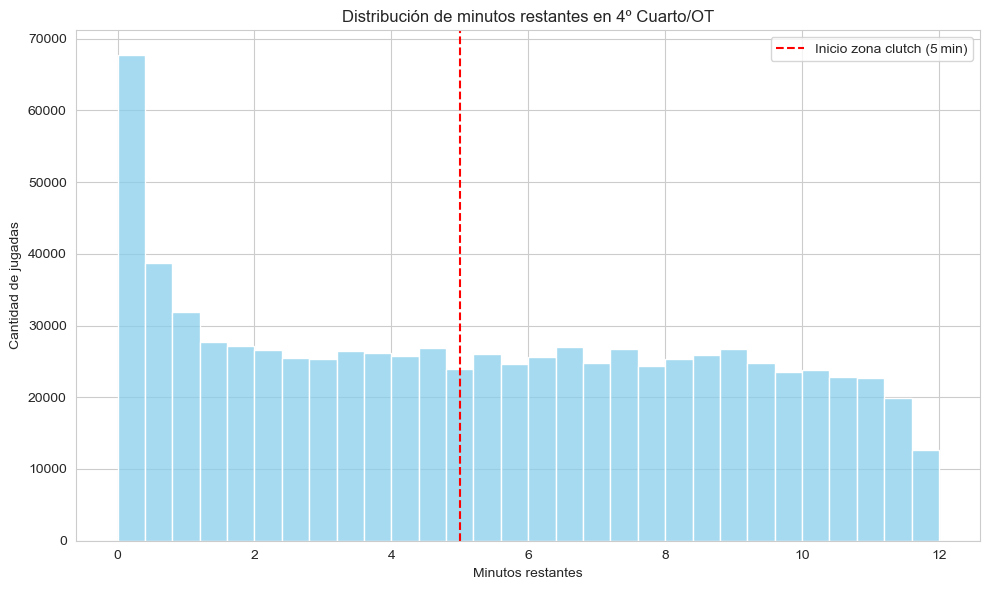

In [6]:
# 1) Unificar todos los DataFrames en uno solo:
df_all = pd.concat(dataframes_pbp.values(), ignore_index=True)

# 2) Convertir columnas relevantes a numérico (evitar strings que rompen los filtros):
df_all["Quarter"]   = pd.to_numeric(df_all["Quarter"],   errors="coerce")
df_all["SecLeft"]   = pd.to_numeric(df_all["SecLeft"],   errors="coerce")
df_all["HomeScore"] = pd.to_numeric(df_all["HomeScore"], errors="coerce")
df_all["AwayScore"] = pd.to_numeric(df_all["AwayScore"], errors="coerce")

# 3) Crear la columna booleana "Clutch" en df_all:
#    Marca como True todas las jugadas en ≥4º cuarto, ≤300 segundos restantes y diferencia de ≤5 ptos.
df_all["Clutch"] = (
    (df_all["Quarter"] >= 4) &
    (df_all["SecLeft"]   <= 300) &
    ((df_all["HomeScore"] - df_all["AwayScore"]).abs() <= 5)
)

# (Opcional) Mostrar cuántas jugadas son clutch vs no-clutch:
print(df_all["Clutch"].value_counts().rename({True: "Clutch", False: "No Clutch"}))

# 4) A partir de aquí ya puedes filtrar y graficar. Por ejemplo, para ver cuántas jugadas
#    hay en el 4º cuarto y tiempo extra (sin importar diferencia de puntos):
df_ultimos_cuartos = df_all[df_all["Quarter"] >= 4].copy()

# Ejemplo: histograma de minutos restantes en 4º cuarto y OT
df_ultimos_cuartos["MinLeft"] = df_ultimos_cuartos["SecLeft"] / 60
plt.figure(figsize=(10, 6))
sns.histplot(df_ultimos_cuartos["MinLeft"], bins=30, color="skyblue", kde=False)
plt.axvline(5, color="red", linestyle="--", label="Inicio zona clutch (5 min)")
plt.title("Distribución de minutos restantes en 4º Cuarto/OT")
plt.xlabel("Minutos restantes")
plt.ylabel("Cantidad de jugadas")
plt.legend()
plt.tight_layout()
plt.show()

# Y así sucesivamente con los demás gráficos (scatter de diferencia de puntos, pie chart de Clutch vs No-Clutch, etc.)


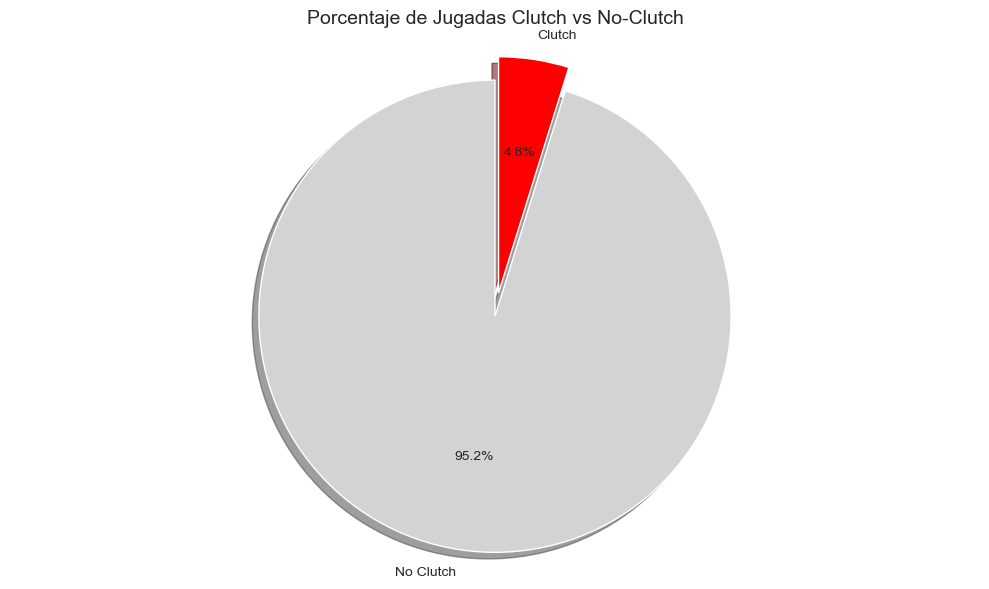

In [7]:

# 1. Pie Chart: % de jugadas clutch vs no-clutch
plt.figure(figsize=(10, 6))
clutch_counts = df_all["Clutch"].value_counts()
labels = ["No Clutch", "Clutch"]
colors = ["lightgray", "red"]
explode = (0, 0.1)  # Para destacar la porción clutch

plt.pie(
    clutch_counts, 
    labels=labels, 
    colors=colors,
    explode=explode,
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90
)
plt.axis('equal')  # Para que el pie chart sea circular
plt.title('Porcentaje de Jugadas Clutch vs No-Clutch', fontsize=14)
plt.tight_layout()
plt.savefig('pie_chart_clutch.png')
plt.show()

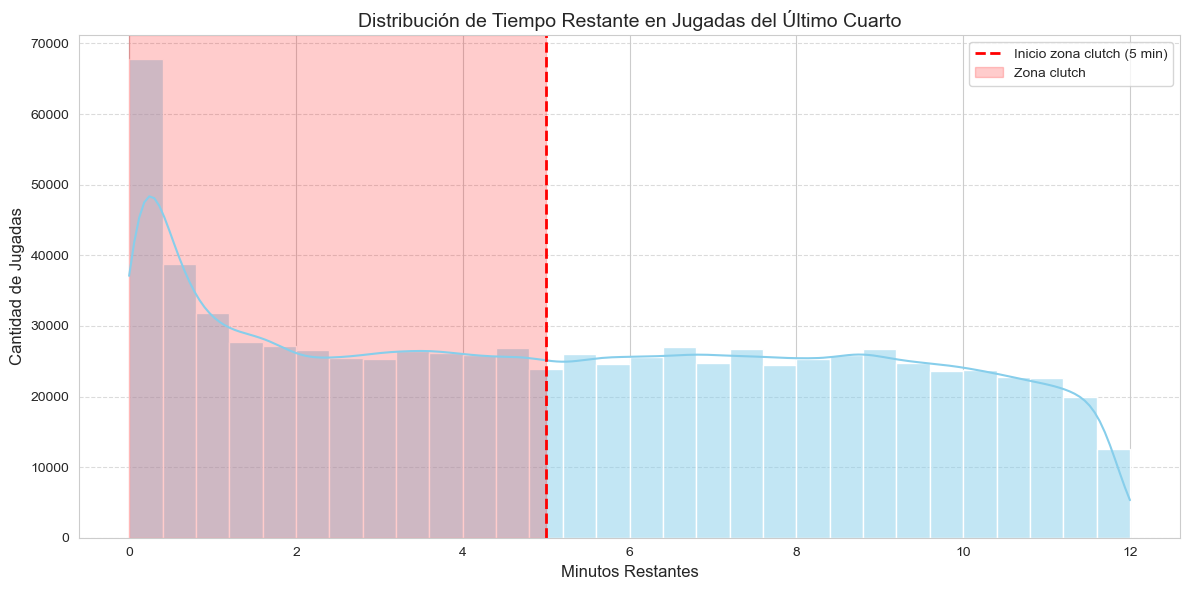

In [8]:

# 2. Histograma de distribución de tiempo restante en jugadas del último cuarto
# Filtrar solo jugadas del último cuarto (Quarter >= 4)
df_ultimo_cuarto = df_all[df_all["Quarter"] >= 4].copy()

# Convertir segundos a minutos para mejor visualización
df_ultimo_cuarto["MinLeft"] = df_ultimo_cuarto["SecLeft"] / 60

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_ultimo_cuarto,
    x="MinLeft",
    bins=30,
    color="skyblue",
    kde=True
)

# Añadir línea vertical para marcar el inicio de la zona clutch (5 minutos)
plt.axvline(5, color="red", linestyle="--", linewidth=2, label="Inicio zona clutch (5 min)")

# Añadir sombreado para la zona clutch
plt.axvspan(0, 5, alpha=0.2, color='red', label="Zona clutch")

plt.title('Distribución de Tiempo Restante en Jugadas del Último Cuarto', fontsize=14)
plt.xlabel('Minutos Restantes', fontsize=12)
plt.ylabel('Cantidad de Jugadas', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('histograma_tiempo_restante.png')
plt.show()


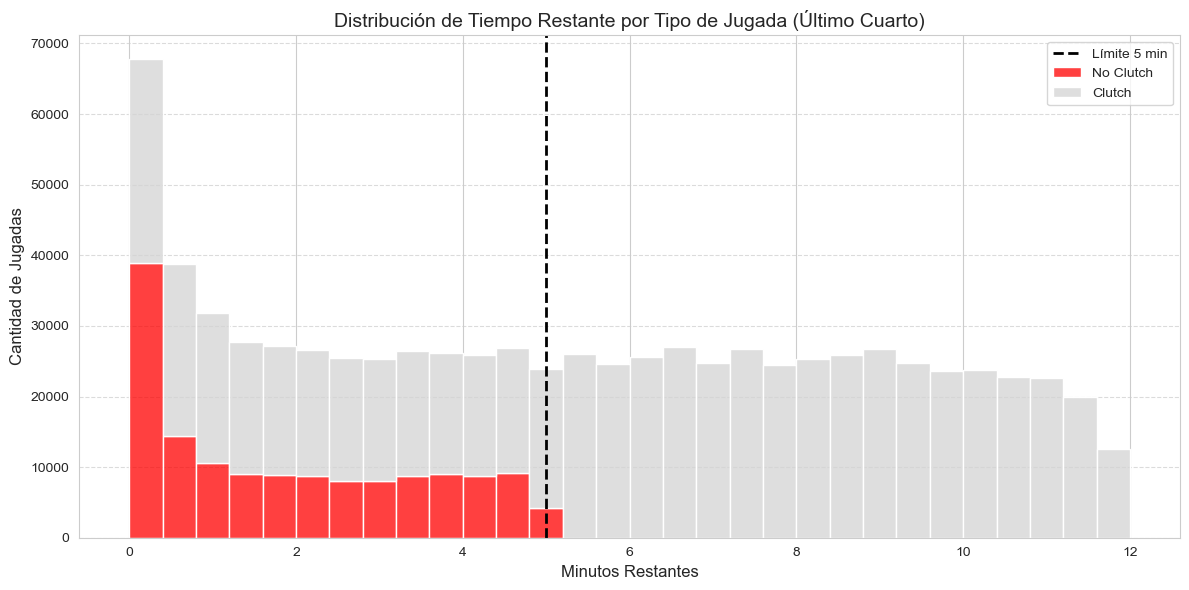

In [9]:

# Bonus: Histograma con diferenciación entre jugadas clutch y no-clutch
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_ultimo_cuarto,
    x="MinLeft",
    hue="Clutch",
    multiple="stack",
    palette=["lightgray", "red"],
    bins=30,
    kde=False
)

plt.axvline(5, color="black", linestyle="--", linewidth=2, label="Límite 5 min")
plt.title('Distribución de Tiempo Restante por Tipo de Jugada (Último Cuarto)', fontsize=14)
plt.xlabel('Minutos Restantes', fontsize=12)
plt.ylabel('Cantidad de Jugadas', fontsize=12)
plt.legend(["Límite 5 min", "No Clutch", "Clutch"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('histograma_tiempo_restante_por_tipo.png')
plt.show() 

In [10]:
# Si no tienes el diccionario dataframes_pbp, puedes crearlo así:
dataframes_pbp = {
     "2015-16": pd.read_csv("NBA_PBP_2015-16.csv"),
     "2016-17": pd.read_csv("NBA_PBP_2016-17.csv"),
     "2017-18": pd.read_csv("NBA_PBP_2017-18.csv"),
     "2018-19": pd.read_csv("NBA_PBP_2018-19.csv"),
     "2019-20": pd.read_csv("NBA_PBP_2019-20.csv"),
     "2020-21": pd.read_csv("NBA_PBP_2020-21.csv"),
}

In [11]:
def identificar_jugadas_clutch(df):
    """Identifica las jugadas clutch en un DataFrame play-by-play"""
    df = df.copy()

    # Convertir columnas necesarias a numéricas
    for col in ["Quarter", "SecLeft", "HomeScore", "AwayScore"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # Filtrar jugadas clutch
    mask_clutch = (
        (df["Quarter"] >= 4) &                                    # 4º cuarto o prórroga
        (df["SecLeft"] <= 300) &                                  # Últimos 5 minutos
        ((df["HomeScore"] - df["AwayScore"]).abs() <= 5)          # Diferencia ≤ 5 puntos
    )

    return df[mask_clutch]

In [12]:

# 1. Primero identificamos los jugadores que tiran en momentos clutch
def analizar_tiradores_clutch(df_tiros_clutch):
    # Agrupar por tirador y calcular estadísticas
    stats_por_jugador = df_tiros_clutch.groupby("Shooter").agg(
        tiros_intentados=("ShotMade", "count"),
        tiros_anotados=("ShotMade", "sum"),
        puntos_clutch=("Points", "sum"),
        temporadas=("Season", "nunique")  # Asumiendo que tienes columna Season
    )
    
    # Calcular eficiencia (FG%)
    stats_por_jugador["eficiencia"] = (
        stats_por_jugador["tiros_anotados"] / stats_por_jugador["tiros_intentados"]
    )
    
    return stats_por_jugador

In [13]:
def obtener_tiros_clutch(df_clutch):
    """Extrae solo los tiros de las jugadas clutch"""
    # Filtrar filas que tengan Shooter y ShotOutcome
    tiros = df_clutch[(df_clutch["Shooter"].notna()) & (df_clutch["ShotOutcome"].notna())]

    # Normalizar ShotOutcome (made/miss)
    tiros["ShotMade"] = tiros["ShotOutcome"].str.contains("made|make", case=False, na=False).astype(int)

    # Calcular el valor del tiro (2 o 3 puntos)
    if "ShotType" in tiros.columns:
        tiros["ShotValue"] = 2  # valor por defecto
        tiros.loc[tiros["ShotType"].str.contains("3pt", case=False, na=False), "ShotValue"] = 3
    else:
        tiros["ShotValue"] = 2  # asumimos 2 puntos si no hay información de tipo

    # Calcular puntos anotados
    tiros["Points"] = tiros["ShotMade"] * tiros["ShotValue"]

    return tiros

In [14]:

print("Analizando jugadas clutch por temporada...")
tiros_clutch_por_temporada = {}

for temporada, df in dataframes_pbp.items():
    print(f"Procesando temporada {temporada}...")
    
    # Identificar jugadas clutch
    df_clutch = identificar_jugadas_clutch(df)
    
    # Obtener tiros en momentos clutch
    df_tiros = obtener_tiros_clutch(df_clutch)
    
    # Añadir columna de temporada si no existe
    if "Season" not in df_tiros.columns:
        df_tiros["Season"] = temporada
    
    tiros_clutch_por_temporada[temporada] = df_tiros
    
    print(f"✅ Temporada {temporada}: {len(df_tiros):,} tiros clutch encontrados")


Analizando jugadas clutch por temporada...
Procesando temporada 2015-16...


/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_95683/3954462471.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiros["ShotMade"] = tiros["ShotOutcome"].str.contains("made|make", case=False, na=False).astype(int)
/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_95683/3954462471.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiros["ShotValue"] = 2  # valor por defecto
/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_95683/3954462471.py:17: SettingWithCopyWarning: 
A 

✅ Temporada 2015-16: 9,057 tiros clutch encontrados
Procesando temporada 2016-17...


/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_95683/3954462471.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiros["ShotMade"] = tiros["ShotOutcome"].str.contains("made|make", case=False, na=False).astype(int)
/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_95683/3954462471.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiros["ShotValue"] = 2  # valor por defecto
/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_95683/3954462471.py:17: SettingWithCopyWarning: 
A 

✅ Temporada 2016-17: 8,862 tiros clutch encontrados
Procesando temporada 2017-18...


/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_95683/3954462471.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiros["ShotMade"] = tiros["ShotOutcome"].str.contains("made|make", case=False, na=False).astype(int)
/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_95683/3954462471.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiros["ShotValue"] = 2  # valor por defecto
/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_95683/3954462471.py:17: SettingWithCopyWarning: 
A 

✅ Temporada 2017-18: 8,715 tiros clutch encontrados
Procesando temporada 2018-19...


/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_95683/3954462471.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiros["ShotMade"] = tiros["ShotOutcome"].str.contains("made|make", case=False, na=False).astype(int)
/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_95683/3954462471.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiros["ShotValue"] = 2  # valor por defecto
/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_95683/3954462471.py:17: SettingWithCopyWarning: 
A 

✅ Temporada 2018-19: 8,846 tiros clutch encontrados
Procesando temporada 2019-20...
✅ Temporada 2019-20: 7,682 tiros clutch encontrados
Procesando temporada 2020-21...
✅ Temporada 2020-21: 1,520 tiros clutch encontrados


/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_95683/3954462471.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiros["ShotMade"] = tiros["ShotOutcome"].str.contains("made|make", case=False, na=False).astype(int)
/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_95683/3954462471.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiros["ShotValue"] = 2  # valor por defecto
/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_95683/3954462471.py:17: SettingWithCopyWarning: 
A 

In [15]:

# Paso 2: Unir todos los tiros clutch en un solo DataFrame
df_tiros_clutch_all = pd.concat(tiros_clutch_por_temporada.values(), ignore_index=True)
print(f"\nTotal de tiros clutch: {len(df_tiros_clutch_all):,}")

# Paso 3: Análisis de Jugadores bajo presión (Clutch)
def analizar_tiradores_clutch(df_tiros_clutch):
    # Agrupar por tirador y calcular estadísticas
    stats_por_jugador = df_tiros_clutch.groupby("Shooter").agg(
        tiros_intentados=("ShotMade", "count"),
        tiros_anotados=("ShotMade", "sum"),
        puntos_clutch=("Points", "sum"),
        temporadas=("Season", "nunique")
    )
    
    # Calcular eficiencia (FG%)
    stats_por_jugador["eficiencia"] = (
        stats_por_jugador["tiros_anotados"] / stats_por_jugador["tiros_intentados"]
    )
    
    return stats_por_jugador



Total de tiros clutch: 44,682


In [16]:

# Paso 4: Visualización: Histograma de distribución de intentos clutch por jugador
def visualizar_distribucion_intentos(stats_jugadores):
    plt.figure(figsize=(12, 8))
    
    # Histograma de intentos
    sns.histplot(
        data=stats_jugadores,
        x="tiros_intentados",
        bins=30,
        color="skyblue",
        kde=True
    )
    
    # Línea vertical en 20 intentos (umbral para considerarse "elite")
    plt.axvline(20, color="red", linestyle="--", linewidth=2, 
                label="Umbral elite (20 intentos)")
    
    # Estadísticas descriptivas
    media = stats_jugadores["tiros_intentados"].mean()
    mediana = stats_jugadores["tiros_intentados"].median()
    
    plt.axvline(media, color="green", linestyle="-", linewidth=1.5, 
                label=f"Media: {media:.1f}")
    plt.axvline(mediana, color="purple", linestyle="-.", linewidth=1.5, 
                label=f"Mediana: {mediana:.1f}")
    
    plt.title('Distribución de Intentos Clutch por Jugador', fontsize=16)
    plt.xlabel('Número de Tiros Intentados', fontsize=14)
    plt.ylabel('Cantidad de Jugadores', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Estadísticas adicionales
    total_jugadores = len(stats_jugadores)
    jugadores_elite = len(stats_jugadores[stats_jugadores["tiros_intentados"] >= 20])
    
    print(f"Total de jugadores que han intentado tiros clutch: {total_jugadores}")
    print(f"Jugadores con 20+ intentos (elite): {jugadores_elite} ({jugadores_elite/total_jugadores*100:.1f}%)")
    print(f"Promedio de intentos clutch por jugador: {media:.2f}")
    print(f"Mediana de intentos clutch por jugador: {mediana:.2f}")

In [17]:

# Paso 5: Visualización: Scatterplot de Intentos vs FG% clutch (filtrado por ≥ 20 intentos)
def visualizar_scatterplot_elite(stats_jugadores):
    # Filtrar jugadores elite (20+ intentos)
    jugadores_elite = stats_jugadores[stats_jugadores["tiros_intentados"] >= 20].copy()
    
    # Calcular estadísticas para referencia
    eficiencia_media = jugadores_elite["eficiencia"].mean()
    intentos_media = jugadores_elite["tiros_intentados"].mean()
    
    plt.figure(figsize=(14, 10))
    
    # Crear scatter plot
    scatter = plt.scatter(
        x=jugadores_elite["tiros_intentados"],
        y=jugadores_elite["eficiencia"],
        s=jugadores_elite["puntos_clutch"] / 2,  # Tamaño proporcional a puntos
        c=jugadores_elite["eficiencia"],  # Color según eficiencia
        cmap="RdYlGn",
        alpha=0.7,
        edgecolors="black"
    )
    
    # Añadir líneas de referencia para promedios
    plt.axhline(eficiencia_media, color="gray", linestyle="--", alpha=0.7,
                label=f"Eficiencia media: {eficiencia_media:.3f}")
    plt.axvline(intentos_media, color="gray", linestyle="--", alpha=0.7,
                label=f"Intentos media: {intentos_media:.1f}")
    
    # Dividir el gráfico en cuadrantes
    plt.text(intentos_media*1.05, eficiencia_media*1.05, "ELITE\n(Alto volumen, alta eficiencia)",
             fontsize=12, ha="left", va="bottom")
    plt.text(intentos_media*0.95, eficiencia_media*1.05, "EFICIENTES\n(Bajo volumen, alta eficiencia)",
             fontsize=12, ha="right", va="bottom")
    plt.text(intentos_media*1.05, eficiencia_media*0.95, "VOLUMEN\n(Alto volumen, baja eficiencia)",
             fontsize=12, ha="left", va="top")
    plt.text(intentos_media*0.95, eficiencia_media*0.95, "DESARROLLO\n(Bajo volumen, baja eficiencia)",
             fontsize=12, ha="right", va="top")
    
    # Etiquetar jugadores destacados (top 10 en puntos)
    top_jugadores = jugadores_elite.sort_values("puntos_clutch", ascending=False).head(10)
    
    for _, jugador in top_jugadores.iterrows():
        plt.annotate(
            jugador.name,  # Nombre del jugador (índice)
            (jugador["tiros_intentados"], jugador["eficiencia"]),
            xytext=(5, 5),
            textcoords="offset points",
            fontsize=11,
            fontweight="bold",
            color="black",
            bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8)
        )
    
    # Añadir barra de color
    cbar = plt.colorbar(scatter)
    cbar.set_label('Eficiencia (FG%)', fontsize=12)
    
    # Configurar el gráfico
    plt.title('Jugadores Elite: Intentos vs Eficiencia en Momentos Clutch', fontsize=16)
    plt.xlabel('Tiros Intentados', fontsize=14)
    plt.ylabel('Eficiencia (FG%)', fontsize=14)
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Mostrar estadísticas de los jugadores elite
    print(f"\nJugadores elite (20+ intentos): {len(jugadores_elite)}")
    print("\nTOP 10 JUGADORES ELITE POR PUNTOS CLUTCH:")
    for i, (nombre, stats) in enumerate(top_jugadores.iterrows(), 1):
        print(f"{i}. {nombre}: {stats['tiros_anotados']}/{stats['tiros_intentados']} ({stats['eficiencia']:.3f}), {stats['puntos_clutch']} pts")

# Paso 6: Ejecutar las visualizaciones

In [18]:
# Calculamos las estadísticas por jugador
stats_jugadores = analizar_tiradores_clutch(df_tiros_clutch_all)

# Generamos l

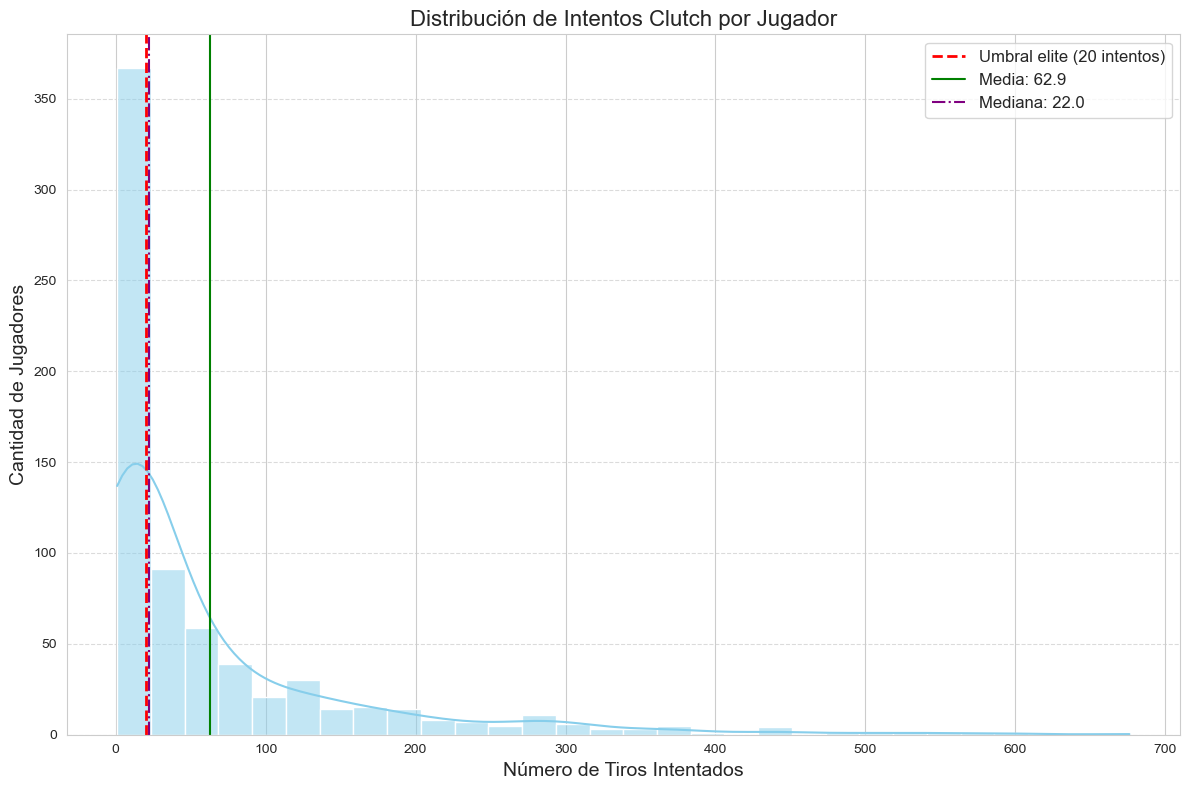

Total de jugadores que han intentado tiros clutch: 710
Jugadores con 20+ intentos (elite): 374 (52.7%)
Promedio de intentos clutch por jugador: 62.93
Mediana de intentos clutch por jugador: 22.00


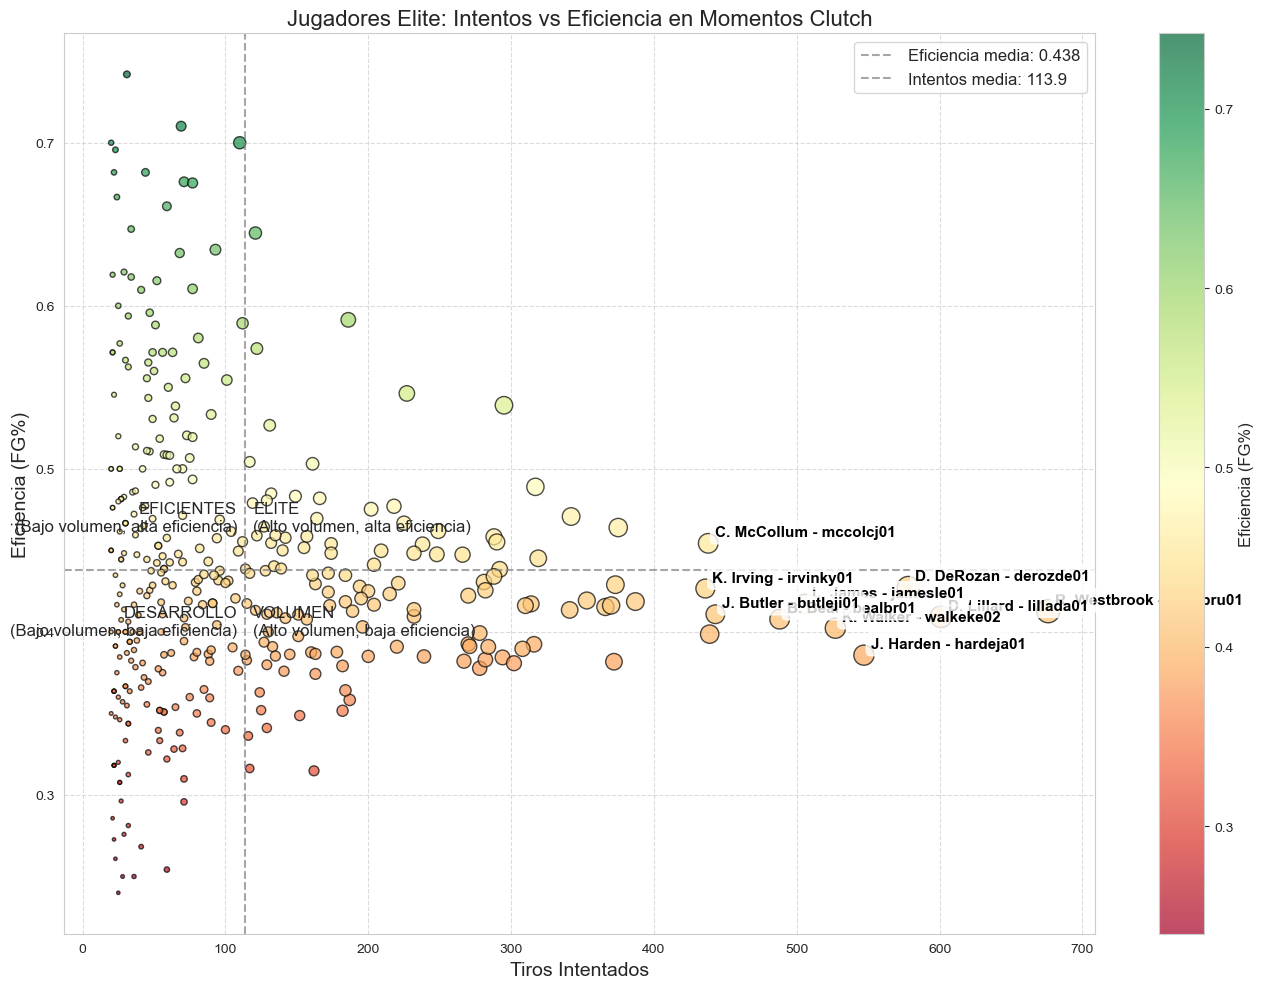


Jugadores elite (20+ intentos): 374

TOP 10 JUGADORES ELITE POR PUNTOS CLUTCH:
1. R. Westbrook - westbru01: 279.0/676.0 (0.413), 558.0 pts
2. D. DeRozan - derozde01: 247.0/578.0 (0.427), 494.0 pts
3. D. Lillard - lillada01: 246.0/601.0 (0.409), 492.0 pts
4. K. Walker - walkeke02: 212.0/527.0 (0.402), 424.0 pts
5. L. James - jamesle01: 211.0/506.0 (0.417), 422.0 pts
6. J. Harden - hardeja01: 211.0/547.0 (0.386), 422.0 pts
7. C. McCollum - mccolcj01: 199.0/438.0 (0.454), 398.0 pts
8. B. Beal - bealbr01: 199.0/488.0 (0.408), 398.0 pts
9. K. Irving - irvinky01: 186.0/436.0 (0.427), 372.0 pts
10. J. Butler - butleji01: 182.0/443.0 (0.411), 364.0 pts


In [19]:
# Luego generamos las visualizaciones
visualizar_distribucion_intentos(stats_jugadores)
visualizar_scatterplot_elite(stats_jugadores)

In [20]:

def analizar_top_performers_clutch(df_tiros_clutch_all, min_intentos=20):
    """
    Analiza los jugadores más efectivos en momentos clutch
    
    Args:
        df_tiros_clutch_all: DataFrame con todos los tiros clutch
        min_intentos: Número mínimo de intentos para considerar al jugador (default: 20)
    """
    # 1. Análisis por temporada
    print("Analizando top performers por temporada...")
    
    # Crear un diccionario para almacenar resultados por temporada
    top_performers_por_temporada = {}
    
    # Iterar por cada temporada
    for temporada in df_tiros_clutch_all["Season"].unique():
        # Filtrar tiros de esta temporada
        df_temporada = df_tiros_clutch_all[df_tiros_clutch_all["Season"] == temporada]
        
        # Calcular estadísticas por jugador
        stats_temporada = df_temporada.groupby("Shooter").agg(
            tiros_intentados=("ShotMade", "count"),
            tiros_anotados=("ShotMade", "sum"),
            puntos_clutch=("Points", "sum")
        )
        
        # Calcular eficiencia
        stats_temporada["eficiencia"] = stats_temporada["tiros_anotados"] / stats_temporada["tiros_intentados"]
        
        # Filtrar por mínimo de intentos (ajustado por temporada)
        min_intentos_temporada = min(min_intentos, int(stats_temporada["tiros_intentados"].quantile(0.9)))
        stats_filtradas = stats_temporada[stats_temporada["tiros_intentados"] >= min_intentos_temporada]
        
        # Ordenar por eficiencia
        top_performers = stats_filtradas.sort_values("eficiencia", ascending=False)
        
        # Guardar en el diccionario
        top_performers_por_temporada[temporada] = top_performers
        
        print(f"✅ Temporada {temporada}: {len(top_performers)} jugadores con {min_intentos_temporada}+ intentos")
        # 2. Análisis global (todas las temporadas)
    # Calcular estadísticas por jugador para todas las temporadas
    stats_global = df_tiros_clutch_all.groupby("Shooter").agg(
        tiros_intentados=("ShotMade", "count"),
        tiros_anotados=("ShotMade", "sum"),
        puntos_clutch=("Points", "sum"),
        temporadas=("Season", "nunique")
    )
    
    # Calcular eficiencia
    stats_global["eficiencia"] = stats_global["tiros_anotados"] / stats_global["tiros_intentados"]
    
    # Filtrar por mínimo de intentos
    stats_global_filtradas = stats_global[stats_global["tiros_intentados"] >= min_intentos]
    
    # Ordenar por eficiencia
    top_performers_global = stats_global_filtradas.sort_values("eficiencia", ascending=False)
    
    print(f"\nAnálisis global: {len(top_performers_global)} jugadores con {min_intentos}+ intentos")
    
    return top_performers_por_temporada, top_performers_global

    

In [21]:

def visualizar_top_performers_por_temporada(top_performers_dict):
    """
    Visualiza los top 10 jugadores más efectivos por temporada
    
    Args:
        top_performers_dict: Diccionario con top performers por temporada
    """
    # Configurar el número de filas y columnas para subplots
    n_temporadas = len(top_performers_dict)
    n_cols = min(3, n_temporadas)
    n_rows = (n_temporadas + n_cols - 1) // n_cols
    
    # Crear figura
    plt.figure(figsize=(18, 5 * n_rows))
    
    # Iterar por cada temporada
    for i, (temporada, top_performers) in enumerate(top_performers_dict.items(), 1):
        # Tomar los top 10
        top10 = top_performers.head(10)
        
        # Crear subplot
        plt.subplot(n_rows, n_cols, i)
        
        # Crear barplot horizontal
        bars = plt.barh(
            y=top10.index,
            width=top10["eficiencia"],
            color=plt.cm.viridis(top10["eficiencia"]),
            alpha=0.8,
            edgecolor="black",
            linewidth=1
        )
        
        # Añadir etiquetas con tiros anotados/intentados
        for j, (_, row) in enumerate(top10.iterrows()):
            plt.text(
                row["eficiencia"] + 0.01, j,
                f"{row['tiros_anotados']}/{row['tiros_intentados']} ({row['eficiencia']:.3f})",
                va="center", fontsize=9
            )
        
        # Configurar gráfico
        plt.title(f"Top 10 en FG% Clutch - Temporada {temporada}", fontsize=14)
        plt.xlabel("Eficiencia (FG%)", fontsize=12)
        plt.xlim(0, min(1.0, top10["eficiencia"].max() + 0.15))
        plt.gca().invert_yaxis()  # Para que el mejor aparezca arriba
        plt.grid(axis="x", linestyle="--", alpha=0.7)
    
    plt.tight_layout()
    plt.show()

In [22]:

def visualizar_volumen_vs_eficiencia(top_performers_global):
    """
    Visualiza la relación entre volumen y eficiencia en el clutch
    
    Args:
        top_performers_global: DataFrame con estadísticas globales de jugadores
    """
    # Crear figura
    plt.figure(figsize=(14, 10))
    
    # Calcular estadísticas para referencia
    eficiencia_media = top_performers_global["eficiencia"].mean()
    intentos_media = top_performers_global["tiros_intentados"].mean()
    
    # Crear scatter plot
    scatter = plt.scatter(
        x=top_performers_global["tiros_intentados"],
        y=top_performers_global["eficiencia"],
        s=top_performers_global["puntos_clutch"] / 2,  # Tamaño proporcional a puntos
        c=top_performers_global["temporadas"],  # Color según número de temporadas
        cmap="plasma",
        alpha=0.7,
        edgecolors="black"
    )
    
    # Añadir líneas de referencia para promedios
    plt.axhline(eficiencia_media, color="gray", linestyle="--", alpha=0.7,
                label=f"Eficiencia media: {eficiencia_media:.3f}")
    plt.axvline(intentos_media, color="gray", linestyle="--", alpha=0.7,
                label=f"Intentos media: {intentos_media:.1f}")
    
    # Dividir el gráfico en cuadrantes
    plt.text(intentos_media*1.05, eficiencia_media*1.05, "ELITE\n(Alto volumen, alta eficiencia)",
             fontsize=12, ha="left", va="bottom", bbox=dict(facecolor='white', alpha=0.5))
    
    # Identificar jugadores elite (alto volumen, alta eficiencia)
    elite_players = top_performers_global[
        (top_performers_global["tiros_intentados"] > intentos_media) & 
        (top_performers_global["eficiencia"] > eficiencia_media)
    ]
    
    # Etiquetar jugadores elite
    for _, jugador in elite_players.iterrows():
        plt.annotate(
            jugador.name,  # Nombre del jugador (índice)
            (jugador["tiros_intentados"], jugador["eficiencia"]),
            xytext=(5, 0),
            textcoords="offset points",
            fontsize=11,
            fontweight="bold",
            color="black",
            bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8)
        )
    
    # Añadir barra de color
    cbar = plt.colorbar(scatter)
    cbar.set_label('Número de temporadas', fontsize=12)
    
    # Configurar el gráfico
    plt.title('Jugadores Clutch: Volumen vs Eficiencia (2015-2021)', fontsize=16)
    plt.xlabel('Tiros Intentados (Volumen)', fontsize=14)
    plt.ylabel('Eficiencia (FG%)', fontsize=14)
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Mostrar lista de jugadores elite
    print("\n🌟 JUGADORES ELITE (ALTO VOLUMEN + ALTA EFICIENCIA):")
    print(f"Total: {len(elite_players)} jugadores")
    
    # Ordenar por puntos clutch
    elite_sorted = elite_players.sort_values("puntos_clutch", ascending=False)
    
    for i, (nombre, stats) in enumerate(elite_sorted.head(15).iterrows(), 1):
        print(f"{i}. {nombre}: {stats['tiros_anotados']}/{stats['tiros_intentados']} ({stats['eficiencia']:.3f}), {stats['puntos_clutch']} pts, {stats['temporadas']} temporadas")


In [23]:
top_performers_por_temporada, top_performers_global = analizar_top_performers_clutch(df_tiros_clutch_all)


Analizando top performers por temporada...
✅ Temporada 2015-16: 145 jugadores con 20+ intentos
✅ Temporada 2016-17: 152 jugadores con 20+ intentos
✅ Temporada 2017-18: 149 jugadores con 20+ intentos
✅ Temporada 2018-19: 145 jugadores con 20+ intentos
✅ Temporada 2019-20: 133 jugadores con 20+ intentos
✅ Temporada 2020-21: 27 jugadores con 15+ intentos

Análisis global: 374 jugadores con 20+ intentos


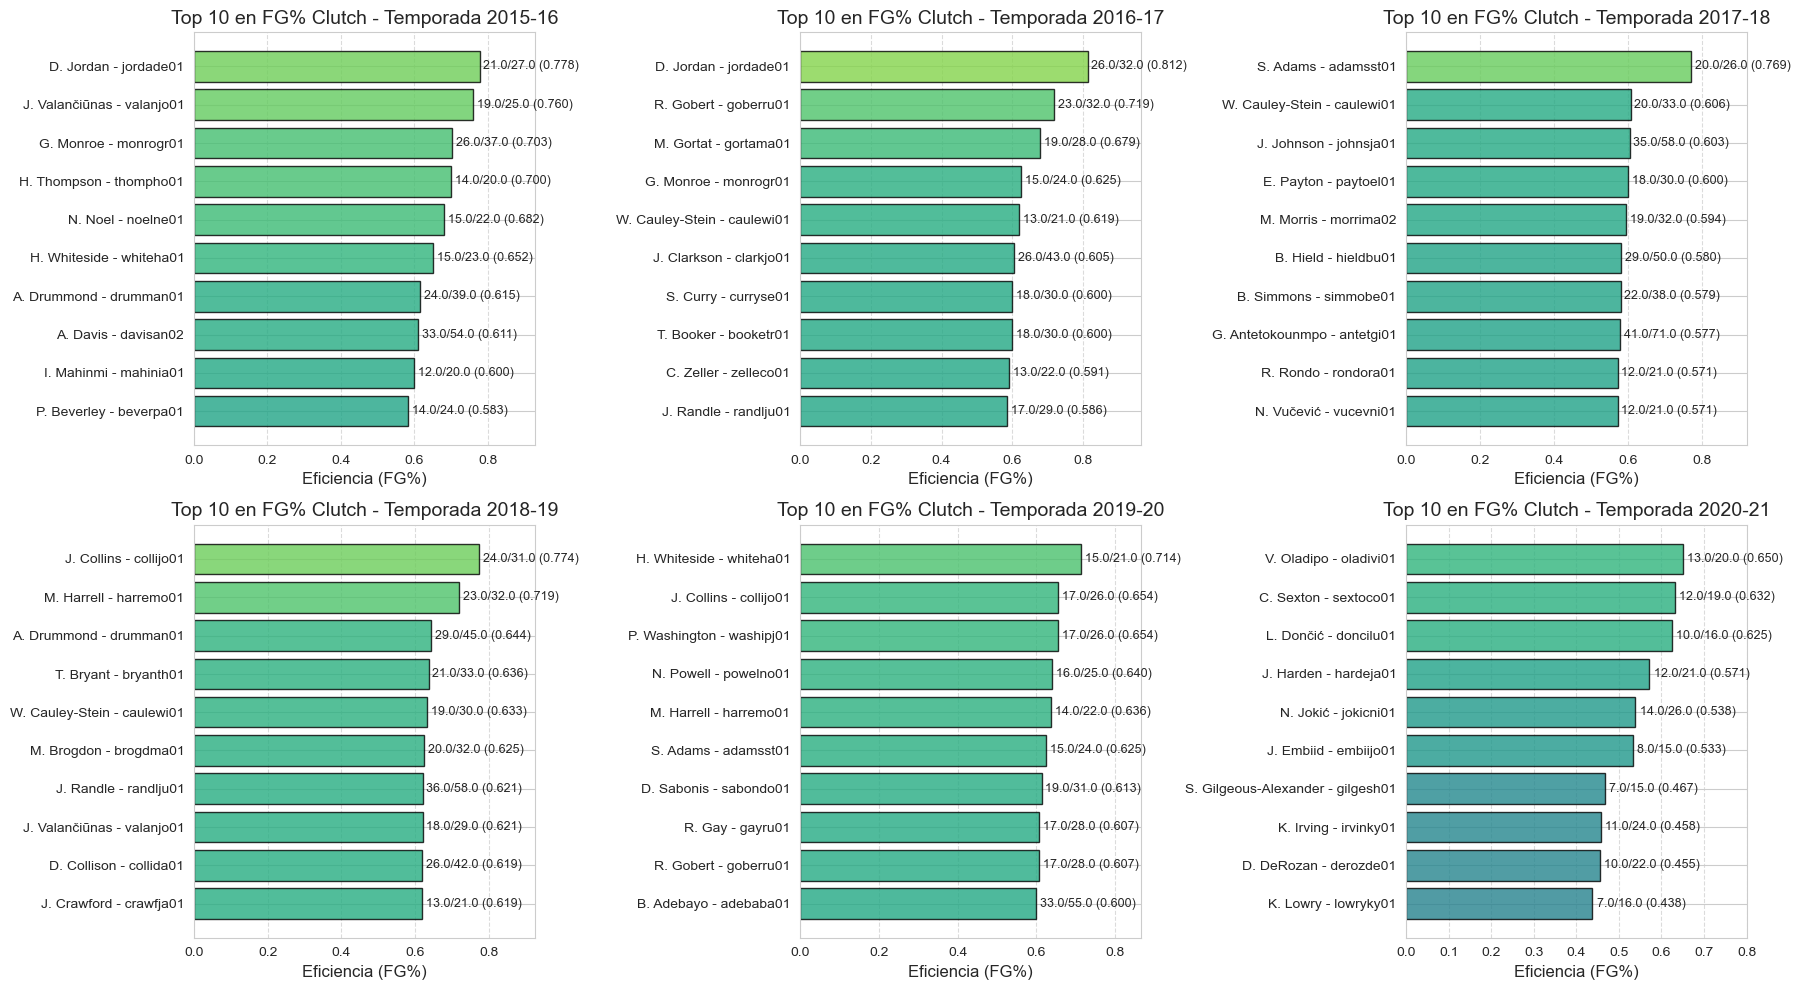

In [24]:
visualizar_top_performers_por_temporada(top_performers_por_temporada)


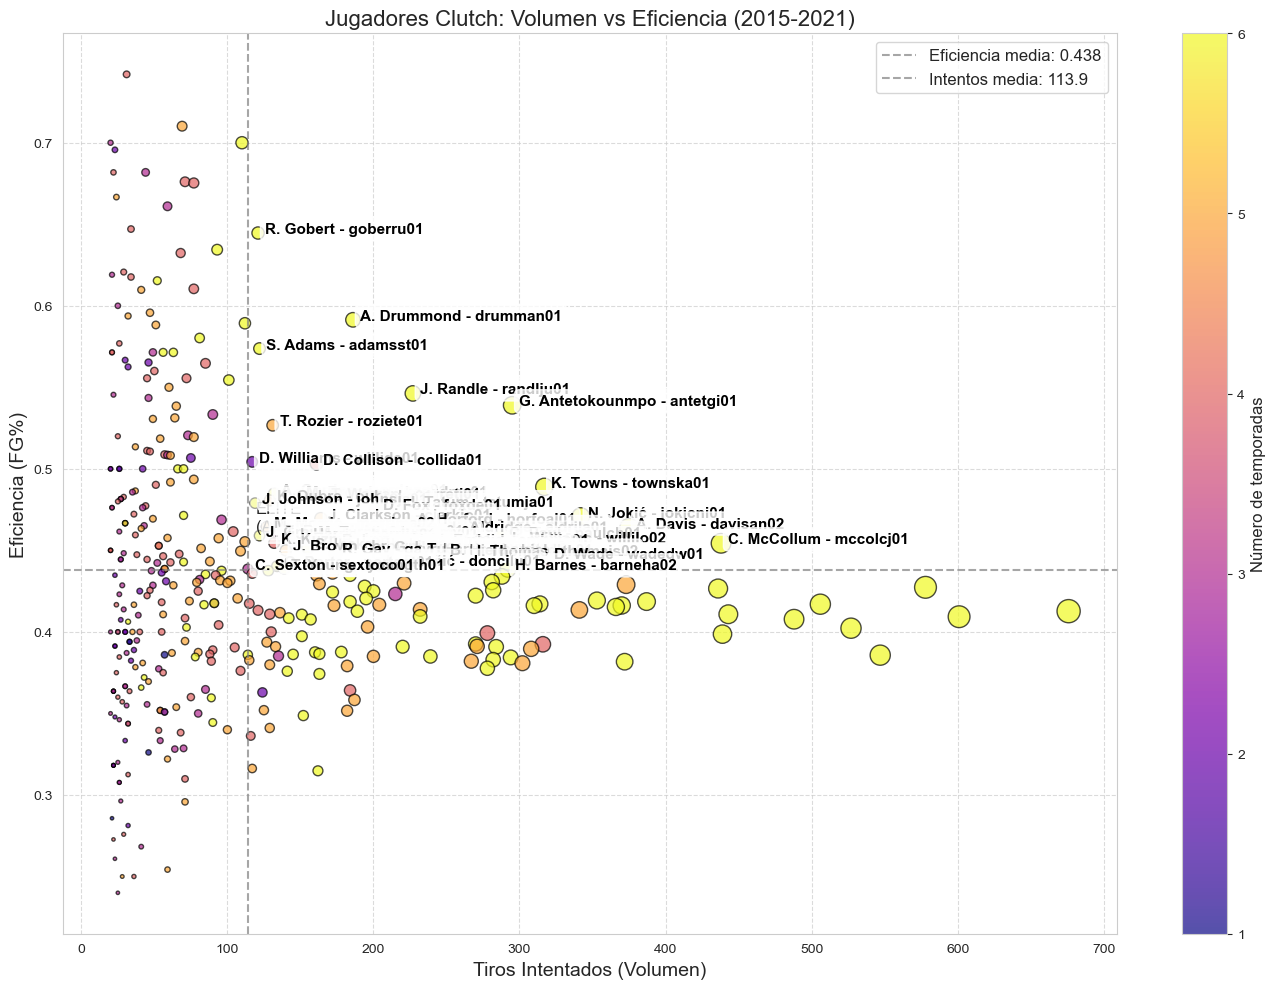


🌟 JUGADORES ELITE (ALTO VOLUMEN + ALTA EFICIENCIA):
Total: 45 jugadores
1. C. McCollum - mccolcj01: 199.0/438.0 (0.454), 398.0 pts, 6.0 temporadas
2. A. Davis - davisan02: 174.0/375.0 (0.464), 348.0 pts, 6.0 temporadas
3. N. Jokić - jokicni01: 161.0/342.0 (0.471), 322.0 pts, 6.0 temporadas
4. G. Antetokounmpo - antetgi01: 159.0/295.0 (0.539), 318.0 pts, 6.0 temporadas
5. K. Towns - townska01: 155.0/317.0 (0.489), 310.0 pts, 6.0 temporadas
6. D. Wade - wadedw01: 142.0/319.0 (0.445), 284.0 pts, 4.0 temporadas
7. L. Williams - willilo02: 132.0/290.0 (0.455), 264.0 pts, 6.0 temporadas
8. C. Paul - paulch01: 132.0/288.0 (0.458), 264.0 pts, 6.0 temporadas
9. H. Barnes - barneha02: 128.0/292.0 (0.438), 256.0 pts, 6.0 temporadas
10. J. Randle - randlju01: 124.0/227.0 (0.546), 248.0 pts, 6.0 temporadas
11. I. Thomas - thomais02: 119.0/266.0 (0.447), 238.0 pts, 5.0 temporadas
12. L. Aldridge - aldrila01: 115.0/249.0 (0.462), 230.0 pts, 6.0 temporadas
13. B. Hield - hieldbu01: 111.0/248.0 (0.448

In [25]:
visualizar_volumen_vs_eficiencia(top_performers_global)

In [26]:
df_player_info = pd.read_csv("player.csv")
df_salaries = pd.read_csv("salaries.csv")  # Si tienes esta información


In [27]:
print("Columnas en top_performers_global:")
print(top_performers_global.columns.tolist())
print("\nPrimeras filas de top_performers_global:")
print(top_performers_global.head())

# Veamos también los nombres en df_salaries
print("\nPrimeras filas de df_salaries:")
print(df_salaries.head())

Columnas en top_performers_global:
['tiros_intentados', 'tiros_anotados', 'puntos_clutch', 'temporadas', 'eficiencia']

Primeras filas de top_performers_global:
                         tiros_intentados  tiros_anotados  puntos_clutch  \
Shooter                                                                    
D. Powell - poweldw01                  31              23             46   
M. Harrell - harremo01                 69              49             98   
D. Jordan - jordade01                 110              77            154   
N. Hilário - hilarne01                 20              14             28   
H. Thompson - thompho01                23              16             32   

                         temporadas  eficiencia  
Shooter                                          
D. Powell - poweldw01             4    0.741935  
M. Harrell - harremo01            5    0.710145  
D. Jordan - jordade01             6    0.700000  
N. Hilário - hilarne01            3    0.700000  
H. Tho

In [28]:
# Cargar el archivo de salarios
df_salaries = pd.read_csv("salaries.csv")

def crear_mapa_calor_correlaciones(stats_clutch, df_player_info, df_salaries, min_intentos=20):
    """
    Crea un mapa de calor que muestra la correlación entre métricas clutch y datos de jugador
    
    Args:
        stats_clutch: DataFrame con estadísticas clutch de jugadores
        df_player_info: DataFrame con información de jugadores
        df_salaries: DataFrame con información de salarios
        min_intentos: Número mínimo de intentos para considerar a un jugador
    """
    # Paso 1: Filtrar jugadores con suficientes intentos
    stats_filtradas = stats_clutch[stats_clutch["tiros_intentados"] >= min_intentos].copy()
    
    # Paso 2: Preparar df_player_info para merge
    # Crear una columna normalizada para nombres en ambos dataframes
    stats_filtradas["nombre_norm"] = stats_filtradas.index.str.lower().str.strip()
    df_player_info["nombre_norm"] = df_player_info["full_name"].str.lower().str.strip()
    
    # Paso 3: Hacer merge con df_player_info
    stats_enriquecidas = stats_filtradas.merge(
        df_player_info,
        left_on="nombre_norm",
        right_on="nombre_norm",
        how="left"
    )
    
    # Paso 4: Preparar df_salaries para merge
    # Usar el salario de 2022/2023 como referencia
    df_salaries_prep = df_salaries.copy()
    df_salaries_prep["nombre_norm"] = df_salaries_prep["Player Name"].str.lower().str.strip()
    df_salaries_prep["salario"] = df_salaries_prep["2022/2023"]
    
    # Paso 5: Hacer merge con df_salaries
    stats_enriquecidas = stats_enriquecidas.merge(
        df_salaries_prep[["nombre_norm", "salario", "Player Id"]],
        left_on="nombre_norm",
        right_on="nombre_norm",
        how="left"
    )
    
    # Paso 6: Seleccionar columnas numéricas para correlación
    columnas_correlacion = [
        "eficiencia", "tiros_intentados", "tiros_anotados", "puntos_clutch", "temporadas",
        "salario"
    ]
    
    # Asegurarse de que todas las columnas existen
    columnas_existentes = [col for col in columnas_correlacion if col in stats_enriquecidas.columns]
    
    # Paso 7: Calcular matriz de correlación
    corr_matrix = stats_enriquecidas[columnas_existentes].corr()
    
    # Paso 8: Visualizar mapa de calor
    plt.figure(figsize=(12, 10))
    
    # Crear máscara para el triángulo superior (opcional)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Crear mapa de calor
    sns.heatmap(
        corr_matrix,
        annot=True,          # Mostrar valores
        fmt=".2f",           # Formato de 2 decimales
        cmap="coolwarm",     # Esquema de colores
        mask=mask,           # Aplicar máscara (opcional)
        square=True,         # Celdas cuadradas
        linewidths=0.5,      # Ancho de líneas entre celdas
        cbar_kws={"shrink": 0.8}  # Tamaño de la barra de color
    )
    
    plt.title("Correlación entre Métricas Clutch y Datos de Jugador", fontsize=16)
    plt.tight_layout()
    plt.show()
    
    return corr_matrix, stats_enriquecidas

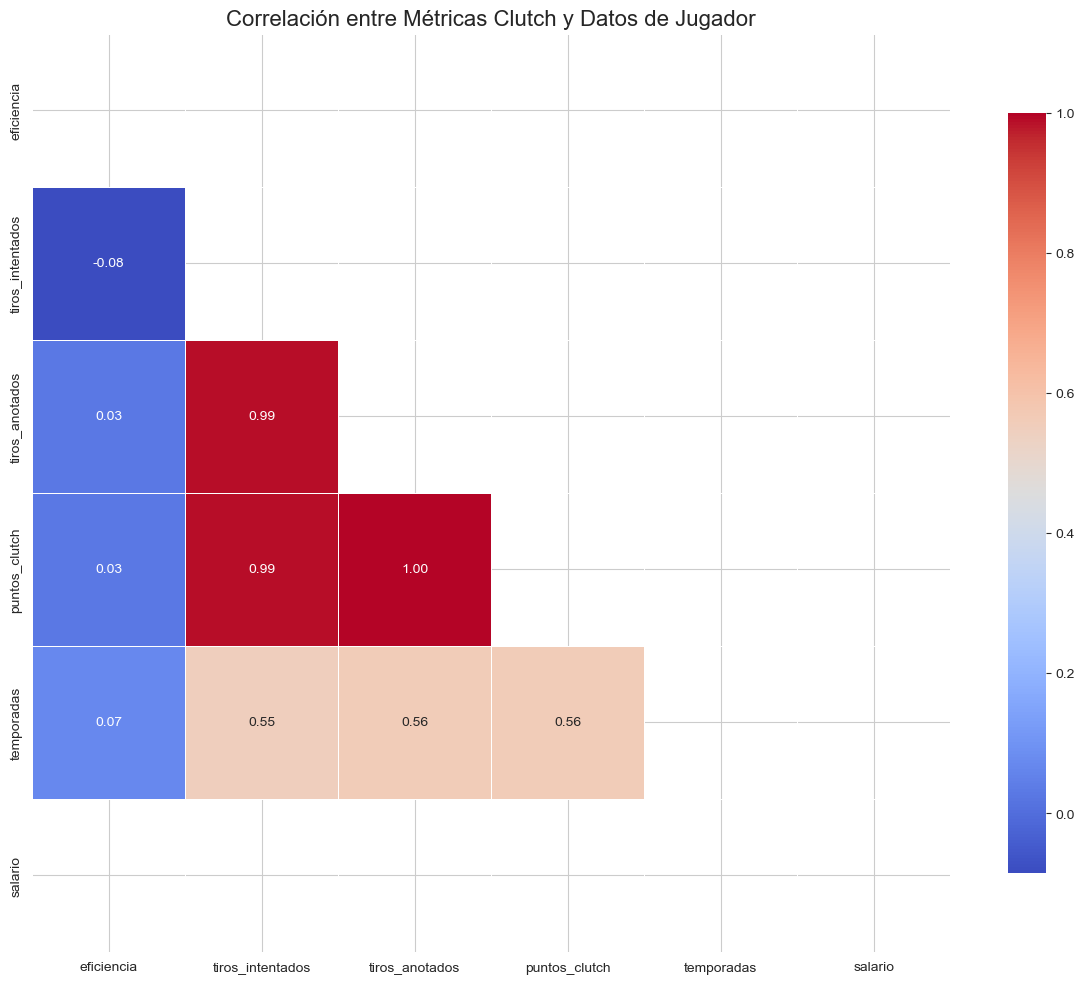

In [29]:

# Uso de la función
corr_matrix, stats_enriquecidas = crear_mapa_calor_correlaciones(
    top_performers_global,  # Estadísticas clutch
    df_player_info,         # Información de jugadores
    df_salaries             # Información de salarios (recién cargado)
)

In [30]:

# Opcional: Mostrar las correlaciones más fuertes
def mostrar_correlaciones_importantes(corr_matrix, umbral=0.3):
    """Muestra las correlaciones más fuertes (por encima del umbral)"""
    # Convertir la matriz a un DataFrame largo
    corr_df = corr_matrix.unstack().reset_index()
    corr_df.columns = ['Variable 1', 'Variable 2', 'Correlación']
    
    # Filtrar autocorrelaciones y correlaciones por debajo del umbral
    corr_df = corr_df[
        (corr_df['Variable 1'] != corr_df['Variable 2']) & 
        (corr_df['Correlación'].abs() >= umbral)
    ]
    
    # Ordenar por valor absoluto de correlación
    corr_df = corr_df.sort_values('Correlación', key=abs, ascending=False)
    
    print(f"\nCorrelaciones importantes (|r| >= {umbral}):")
    for _, row in corr_df.iterrows():
        print(f"{row['Variable 1']} vs {row['Variable 2']}: {row['Correlación']:.3f}")

# Mostrar correlaciones importantes
mostrar_correlaciones_importantes(corr_matrix, umbral=0.3)


Correlaciones importantes (|r| >= 0.3):
tiros_anotados vs puntos_clutch: 1.000
puntos_clutch vs tiros_anotados: 1.000
tiros_intentados vs tiros_anotados: 0.989
tiros_intentados vs puntos_clutch: 0.989
tiros_anotados vs tiros_intentados: 0.989
puntos_clutch vs tiros_intentados: 0.989
tiros_anotados vs temporadas: 0.562
puntos_clutch vs temporadas: 0.562
temporadas vs tiros_anotados: 0.562
temporadas vs puntos_clutch: 0.562
tiros_intentados vs temporadas: 0.550
temporadas vs tiros_intentados: 0.550


In [31]:

def visualizar_clutch_vs_salario(stats_clutch, df_salaries, min_intentos=20):
    """
    Crea un scatterplot que muestra la relación entre rendimiento clutch y salario
    """
    # Paso 1: Filtrar jugadores con suficientes intentos
    stats_filtradas = stats_clutch[stats_clutch["tiros_intentados"] >= min_intentos].copy()
    stats_filtradas = stats_filtradas.reset_index()
    
    # Paso 2: Extraer apellidos de los nombres en stats_filtradas
    def extraer_apellido_stats(nombre_completo):
        # Formato esperado: "D. Powell - poweldw01"
        if " - " in nombre_completo:
            nombre = nombre_completo.split(" - ")[0]  # "D. Powell"
            if ". " in nombre:
                return nombre.split(". ")[1].lower()  # "powell"
            else:
                return nombre.split()[-1].lower()  # último nombre
        else:
            return nombre_completo.split()[-1].lower()  # último nombre
    
    stats_filtradas["apellido"] = stats_filtradas["Shooter"].apply(extraer_apellido_stats)
    
    # Paso 3: Extraer apellidos de los nombres en df_salaries
    df_salaries_prep = df_salaries.copy()
    df_salaries_prep["apellido"] = df_salaries_prep["Player Name"].apply(
        lambda x: x.split()[-1].lower()  # último nombre
    )
    
    # Convertir salarios a numéricos
    df_salaries_prep["salario"] = df_salaries_prep["2022/2023"].str.replace('$', '').str.replace(',', '').astype(float)
    
    # Paso 4: Crear diccionario de salarios por apellido
    salarios_por_apellido = {}
    for _, row in df_salaries_prep.iterrows():
        salarios_por_apellido[row["apellido"]] = row["salario"]
    
    # Paso 5: Asignar salarios basados en apellidos
    stats_filtradas["salario"] = stats_filtradas["apellido"].map(salarios_por_apellido)
    
    # Verificar cuántos jugadores tienen salario asignado
    print(f"Jugadores con salario asignado: {stats_filtradas['salario'].notna().sum()} de {len(stats_filtradas)}")
    
    # Paso 6: Filtrar jugadores sin salario
    stats_completas = stats_filtradas.dropna(subset=["salario"]).copy()
    
    if len(stats_completas) < 5:
        print(f"¡Advertencia! Solo {len(stats_completas)} jugadores tienen datos completos.")
        
        # Mostrar algunos ejemplos de apellidos que no coincidieron
        no_coinciden = stats_filtradas[stats_filtradas["salario"].isna()].head(10)
        print("\nEjemplos de apellidos sin coincidencia:")
        for _, row in no_coinciden.iterrows():
            print(f"  {row['Shooter']} -> Apellido: '{row['apellido']}'")
            
        return stats_filtradas
    
    # Paso 7: Crear el scatterplot
    plt.figure(figsize=(14, 10))
    
    # Crear scatter plot
    scatter = plt.scatter(
        stats_completas["eficiencia"],  # FG% clutch (eje X)
        stats_completas["salario"],     # Salario (eje Y)
        c="green",                      # Color fijo
        s=stats_completas["tiros_intentados"] * 2,  # Tamaño por intentos
        alpha=0.7,  # Transparencia
        edgecolors="white"  # Borde blanco para mejor visibilidad
    )
    
    # Añadir línea de tendencia
    z = np.polyfit(stats_completas["eficiencia"], stats_completas["salario"], 1)
    p = np.poly1d(z)
    plt.plot(
        stats_completas["eficiencia"],
        p(stats_completas["eficiencia"]),
        "k--",
        alpha=0.5
    )
    
    # Calcular y mostrar correlación
    corr = stats_completas["eficiencia"].corr(stats_completas["salario"])
    plt.text(
        0.05, 0.95, 
        f"Correlación: {corr:.2f}", 
        transform=plt.gca().transAxes,
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8)
    )
    
    # Anotar jugadores en el gráfico (top 10 por salario y top 10 por eficiencia)
    top_salarios = stats_completas.nlargest(10, "salario")
    top_eficiencia = stats_completas.nlargest(10, "eficiencia")
    
    jugadores_destacados = pd.concat([top_salarios, top_eficiencia]).drop_duplicates()
    
    for _, row in jugadores_destacados.iterrows():
        nombre_corto = row["Shooter"].split(" - ")[0] if " - " in row["Shooter"] else row["Shooter"]
        plt.annotate(
            nombre_corto,  # Nombre corto del jugador
            (row["eficiencia"], row["salario"]),
            xytext=(5, 5),
            textcoords="offset points",
            fontsize=9,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
        )
    
    # Formatear eje Y como millones de dólares
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
    
    # Añadir títulos y etiquetas
    plt.title("¿Se paga el rendimiento clutch?", fontsize=16)
    plt.xlabel("Eficiencia en momentos clutch (FG%)", fontsize=14)
    plt.ylabel("Salario (2022/2023)", fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # Añadir una nota sobre el tamaño de los puntos
    plt.figtext(
        0.5, 0.01, 
        "El tamaño de cada punto representa el número de intentos en momentos clutch",
        ha="center", fontsize=10
    )
    
    plt.tight_layout()
    plt.show()
    
    return stats_completas

Jugadores con salario asignado: 258 de 374


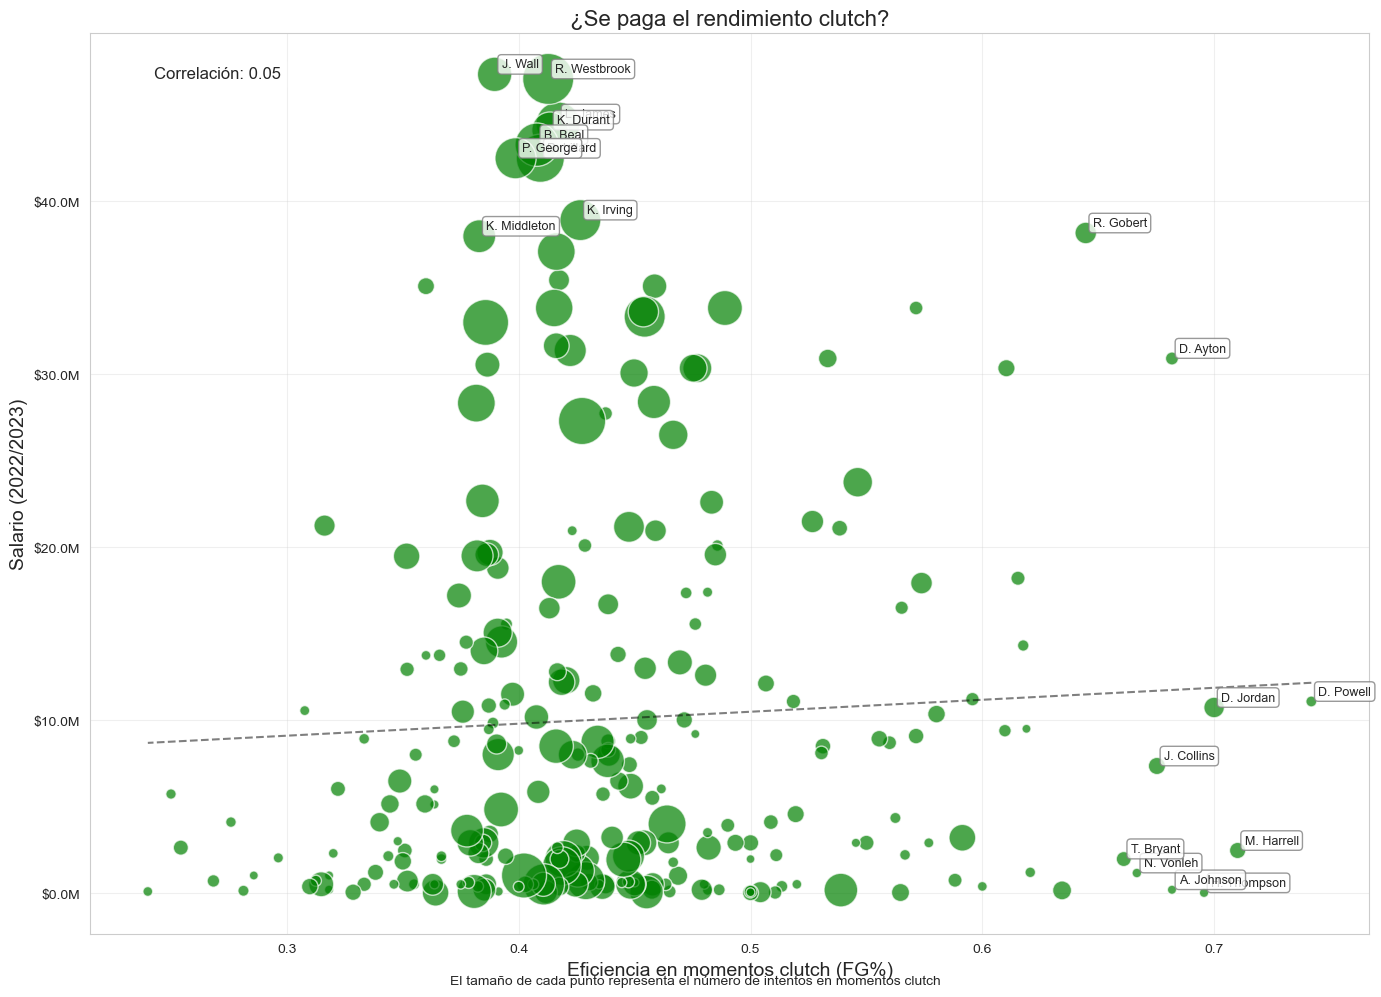

In [32]:
stats_completas = visualizar_clutch_vs_salario(
    top_performers_global,  # Estadísticas clutch
    df_salaries             # Información de salarios
)

In [33]:
# Opcional: Mostrar estadísticas resumidas
print("\nEstadísticas descriptivas:")
print(stats_completas[["eficiencia", "salario", "tiros_intentados"]].describe())


Estadísticas descriptivas:
       eficiencia       salario  tiros_intentados
count  258.000000  2.580000e+02        258.000000
mean     0.442309  1.008738e+07        127.635659
std      0.089449  1.157965e+07        123.648047
min      0.240000  1.670000e+04         20.000000
25%      0.385324  1.017781e+06         38.000000
50%      0.428763  5.791026e+06         77.500000
75%      0.481481  1.446106e+07        170.500000
max      0.741935  4.734576e+07        676.000000


In [34]:

def analizar_tendencias_temporada(stats_clutch):
    """
    Analiza las tendencias de rendimiento clutch por temporada
    
    Args:
        stats_clutch: DataFrame con estadísticas clutch de jugadores
    """
    # Paso 1: Preparar los datos
    # Convertir el índice a columna si es necesario
    if isinstance(stats_clutch.index.name, str) and stats_clutch.index.name == "Shooter":
        stats = stats_clutch.reset_index()
    else:
        stats = stats_clutch.copy()
    
    # Extraer temporada y posición del nombre del jugador
    def extraer_info(nombre):
        # Formato esperado: "D. Powell - poweldw01"
        info = {}
        if " - " in nombre:
            nombre_corto = nombre.split(" - ")[0]
            codigo = nombre.split(" - ")[1]
            
            # Extraer la primera letra del nombre como aproximación de la posición
            # G (Guard), F (Forward), C (Center)
            primera_letra = nombre_corto[0].upper()
            if primera_letra in ["G", "P"]:  # P por Point Guard
                info["posicion"] = "G"  # Guard
            elif primera_letra in ["C"]:
                info["posicion"] = "C"  # Center
            else:
                info["posicion"] = "F"  # Forward
        else:
            info["posicion"] = "Desconocido"
        
        return info
    
    # Aplicar la función a cada jugador
    posiciones = []
    for nombre in stats["Shooter"]:
        info = extraer_info(nombre)
        posiciones.append(info["posicion"])
    
    stats["posicion"] = posiciones
    
    # Paso 2: Crear un DataFrame con datos por temporada y posición
    # Agrupar por temporada y posición
    stats_por_temporada_posicion = stats.groupby(["temporadas", "posicion"]).agg({
        "eficiencia": "mean",
        "tiros_intentados": "sum",
        "tiros_anotados": "sum"
    }).reset_index()
    
    # Paso 3: Crear un gráfico de líneas para FG% por posición a lo largo de las temporadas
    plt.figure(figsize=(14, 8))
    
    # Definir colores para cada posición
    colores = {"G": "blue", "F": "green", "C": "red", "Desconocido": "gray"}
    
    # Crear líneas para cada posición
    for posicion in stats_por_temporada_posicion["posicion"].unique():
        datos_posicion = stats_por_temporada_posicion[stats_por_temporada_posicion["posicion"] == posicion]
        plt.plot(
            datos_posicion["temporadas"],
            datos_posicion["eficiencia"],
            marker="o",
            linewidth=3,
            markersize=8,
            label=f"{posicion} (Posición)",
            color=colores.get(posicion, "gray")
        )
    
    # Añadir línea para el promedio general
    stats_por_temporada = stats.groupby("temporadas").agg({
        "eficiencia": "mean"
    }).reset_index()
    
    plt.plot(
        stats_por_temporada["temporadas"],
        stats_por_temporada["eficiencia"],
        marker="s",
        linewidth=3,
        linestyle="--",
        markersize=8,
        label="Promedio General",
        color="black"
    )
    
    # Añadir etiquetas y título
    plt.title("Eficiencia Clutch (FG%) por Posición a lo largo de las Temporadas", fontsize=16)
    plt.xlabel("Temporada", fontsize=14)
    plt.ylabel("Eficiencia Clutch (FG%)", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    
    # Formatear eje Y como porcentaje
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1%}'))
    
    # Ajustar eje X para mostrar todas las temporadas
    plt.xticks(stats_por_temporada["temporadas"].unique())
    
    plt.tight_layout()
    plt.show()
    
    # Paso 4: Extraer equipos de los nombres de jugadores
    # Esta parte es más compleja y requeriría información adicional
    # Como alternativa, podemos mostrar los intentos clutch por jugador en la última temporada
    
    # Filtrar jugadores de la última temporada disponible
    ultima_temporada = stats["temporadas"].max()
    stats_ultima_temporada = stats[stats["temporadas"] == ultima_temporada].copy()
    
    # Ordenar por intentos y tomar los top 15
    top_jugadores = stats_ultima_temporada.nlargest(15, "tiros_intentados")
    
    # Crear un gráfico de barras
    plt.figure(figsize=(14, 10))
    
    # Crear barras horizontales
    barras = plt.barh(
        [nombre.split(" - ")[0] for nombre in top_jugadores["Shooter"]],  # Nombres cortos
        top_jugadores["tiros_intentados"],
        color=[colores.get(pos, "gray") for pos in top_jugadores["posicion"]],
        alpha=0.7,
        edgecolor="black"
    )
    
    # Añadir etiquetas de eficiencia en las barras
    for i, (_, jugador) in enumerate(top_jugadores.iterrows()):
        plt.text(
            jugador["tiros_intentados"] + 5,
            i,
            f"{jugador['eficiencia']:.1%}",
            va="center",
            fontsize=10,
            fontweight="bold"
        )
    
    # Añadir etiquetas y título
    plt.title(f"Top 15 Jugadores por Intentos Clutch (Temporada {ultima_temporada})", fontsize=16)
    plt.xlabel("Intentos Clutch", fontsize=14)
    plt.ylabel("Jugador", fontsize=14)
    plt.grid(True, alpha=0.3, axis="x")
    
    # Crear leyenda para posiciones
    from matplotlib.patches import Patch
    leyenda_elementos = [Patch(facecolor=color, edgecolor="black", label=pos) 
                         for pos, color in colores.items() if pos in top_jugadores["posicion"].values]
    plt.legend(handles=leyenda_elementos, title="Posición", loc="lower right")
    
    plt.tight_layout()
    plt.show()
    
    return stats_por_temporada_posicion, top_jugadores


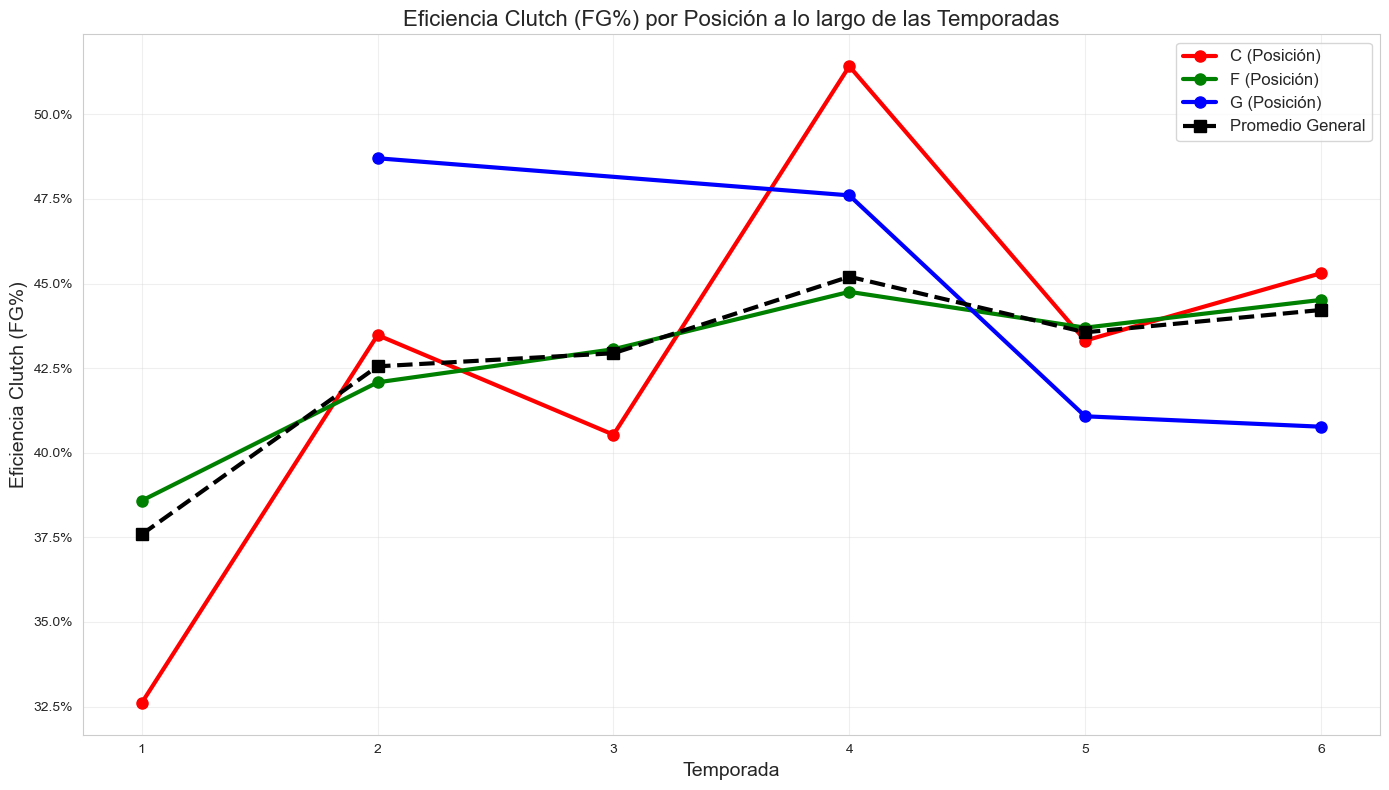

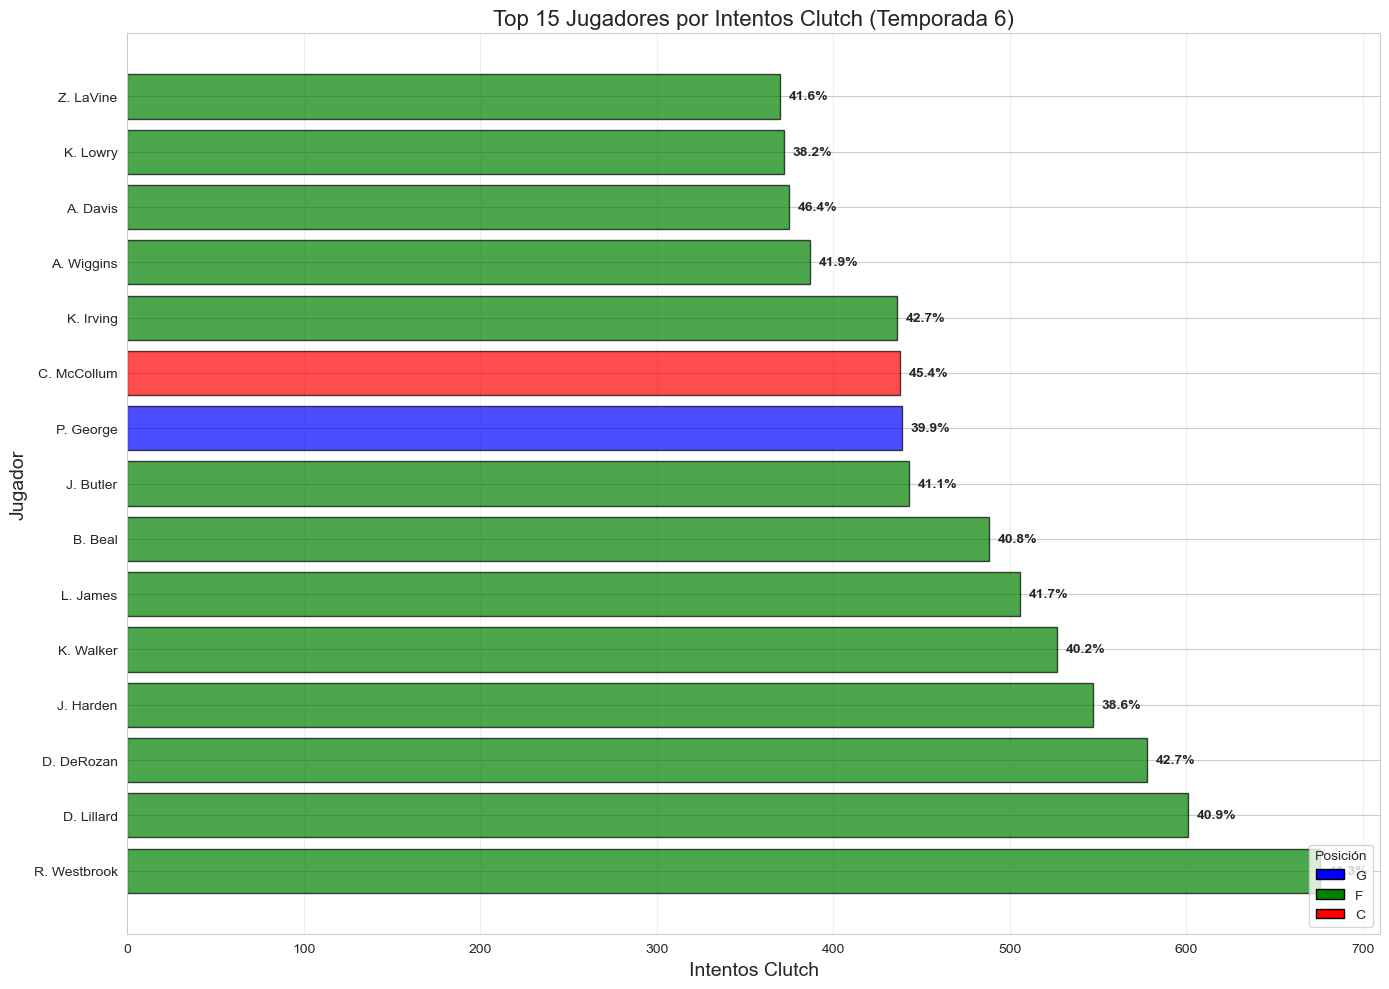

In [35]:
stats_por_temporada_posicion, top_jugadores = analizar_tendencias_temporada(top_performers_global)

In [37]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as XGBRegressor

# Configurar el estilo de las visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")


In [46]:
# Cargar los datos
# 1. Datos de valor comercial y clutch
valor_comercial_df = pd.read_csv('modelo_valor_comercial_clutch.csv')

# 2. Datos de jugadores
players_df = pd.read_csv('player.csv')

# 3. Datos de salarios
salaries_df = pd.read_csv('salaries.csv')

# 4. Datos de draft
draft_df = pd.read_csv('draft_history.csv')

# 5. Datos de jugadores clutch de elite
clutch_elite_df = pd.read_csv('jugadores_clutch_elite.csv')

# Mostrar las primeras filas de los datos de valor comercial
valor_comercial_df.head()


,Shooter,tiros_intentados,tiros_anotados,puntos_clutch,temporadas,eficiencia,Shooter_norm,full_name_norm,is_active,id,valor_comercial_index,valor_comercial_pred,potencial_adicional
0,A. Afflalo - afflaar01,85,31,62,3,0.365,a. afflalo - afflaar01,NaN,NaN,NaN,25.448126,27.051788,1.603662e+00
1,A. Ajinça - ajincal01,4,1,2,2,0.250,a. ajinça - ajincal01,NaN,NaN,NaN,13.559203,12.581337,-9.778663e-01
2,A. Aminu - aminual01,116,39,78,4,0.336,a. aminu - aminual01,NaN,NaN,NaN,27.732168,27.562329,-1.698386e-01
3,A. Anderson - anderal01,1,0,0,1,0.000,a. anderson - anderal01,NaN,NaN,NaN,1.696252,1.696252,3.330669e-15
4,A. Bargnani - bargnan01,3,1,2,1,0.333,a. bargnani - bargnan01,NaN,NaN,NaN,15.182951,15.182951,1.243450e-14


Resumen estadístico de valor comercial:
       tiros_intentados  tiros_anotados  puntos_clutch  eficiencia  \
count        710.000000      710.000000     710.000000  710.000000   
mean          62.932394       27.121127      54.242254    0.437852   
std           97.201757       41.227149      82.454298    0.217532   
min            1.000000        0.000000       0.000000    0.000000   
25%            5.000000        2.000000       4.000000    0.351250   
50%           22.000000        9.000000      18.000000    0.429000   
75%           75.000000       34.000000      68.000000    0.500000   
max          676.000000      279.000000     558.000000    1.000000   

       valor_comercial_index  
count             710.000000  
mean               27.414306  
std                13.029628  
min                 1.696252  
25%                20.259978  
50%                27.444369  
75%                35.668603  
max                76.520000  


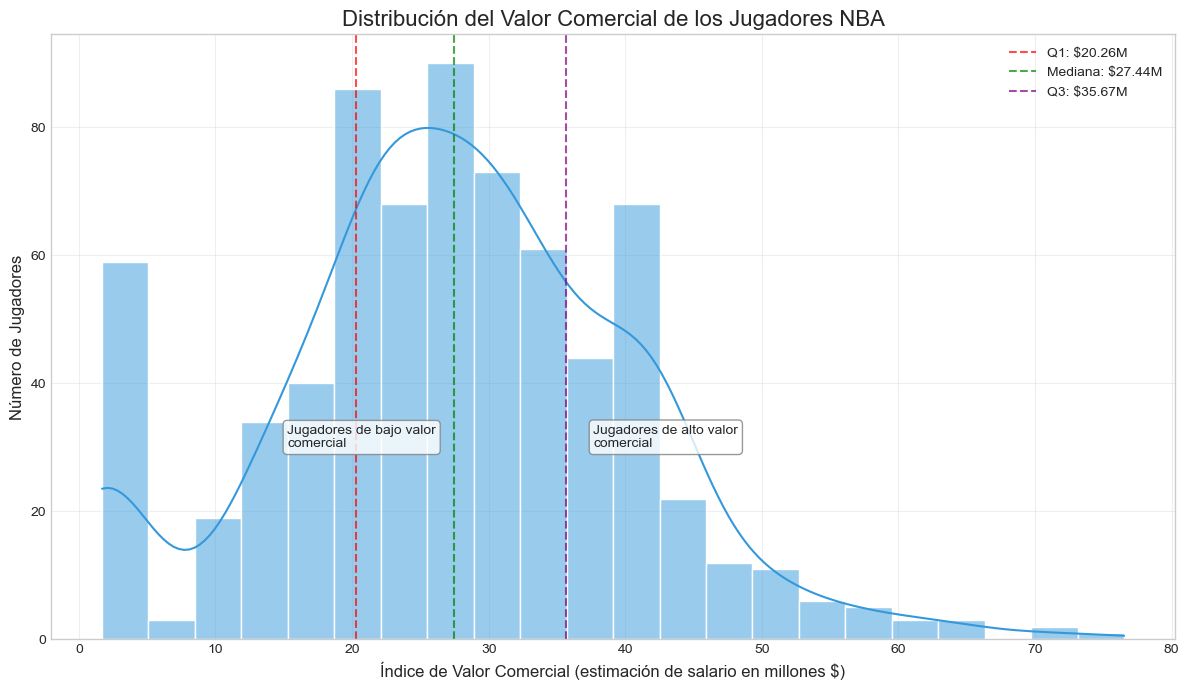

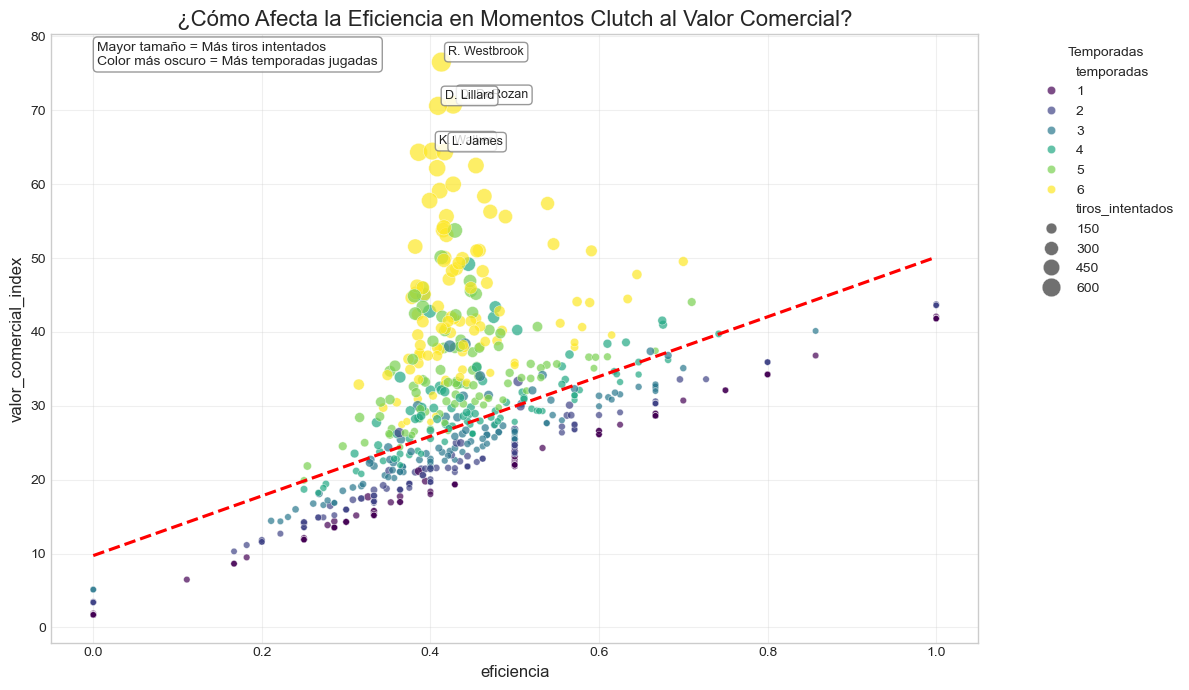

In [49]:
# Exploración de datos
# Resumen estadístico de las variables principales
print("Resumen estadístico de valor comercial:")
print(valor_comercial_df[['tiros_intentados', 'tiros_anotados', 'puntos_clutch', 'eficiencia', 'valor_comercial_index']].describe())

# Visualizar la distribución del valor comercial
plt.figure(figsize=(12, 7))
ax = sns.histplot(valor_comercial_df['valor_comercial_index'], kde=True, color='#3498db')
plt.title('Distribución del Valor Comercial de los Jugadores NBA', fontsize=16)
plt.xlabel('Índice de Valor Comercial (estimación de salario en millones $)', fontsize=12)
plt.ylabel('Número de Jugadores', fontsize=12)

# Añadir líneas verticales para los cuartiles
q1 = valor_comercial_df['valor_comercial_index'].quantile(0.25)
q2 = valor_comercial_df['valor_comercial_index'].quantile(0.5)
q3 = valor_comercial_df['valor_comercial_index'].quantile(0.75)

plt.axvline(q1, color='red', linestyle='--', alpha=0.7, label=f'Q1: ${q1:.2f}M')
plt.axvline(q2, color='green', linestyle='--', alpha=0.7, label=f'Mediana: ${q2:.2f}M')
plt.axvline(q3, color='purple', linestyle='--', alpha=0.7, label=f'Q3: ${q3:.2f}M')

# Añadir anotaciones
plt.annotate('Jugadores de bajo valor\ncomercial', xy=(q1-5, 30), fontsize=10, 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
plt.annotate('Jugadores de alto valor\ncomercial', xy=(q3+2, 30), fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Relación entre eficiencia clutch y valor comercial
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(data=valor_comercial_df, x='eficiencia', y='valor_comercial_index', 
                hue='temporadas', size='tiros_intentados', sizes=(20, 200), alpha=0.7,
                palette="viridis")

plt.title('¿Cómo Afecta la Eficiencia en Momentos Clutch al Valor Comercial?', fontsize=16)
plt.xlabel('Eficiencia en Momentos Decisivos (FG%)', fontsize=12)
plt.ylabel('Valor Comercial (millones $)', fontsize=12)

# Añadir línea de tendencia
sns.regplot(data=valor_comercial_df, x='eficiencia', y='valor_comercial_index', 
           scatter=False, ci=None, color='red', line_kws={"linestyle":"--"})

# Añadir anotaciones para jugadores destacados
top_players = valor_comercial_df.nlargest(5, 'valor_comercial_index')
for idx, player in top_players.iterrows():
    plt.annotate(player['Shooter'].split(' - ')[0], 
                xy=(player['eficiencia'], player['valor_comercial_index']),
                xytext=(5, 5), textcoords='offset points', fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Añadir explicación
plt.annotate('Mayor tamaño = Más tiros intentados\nColor más oscuro = Más temporadas jugadas', 
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.legend(title='Temporadas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


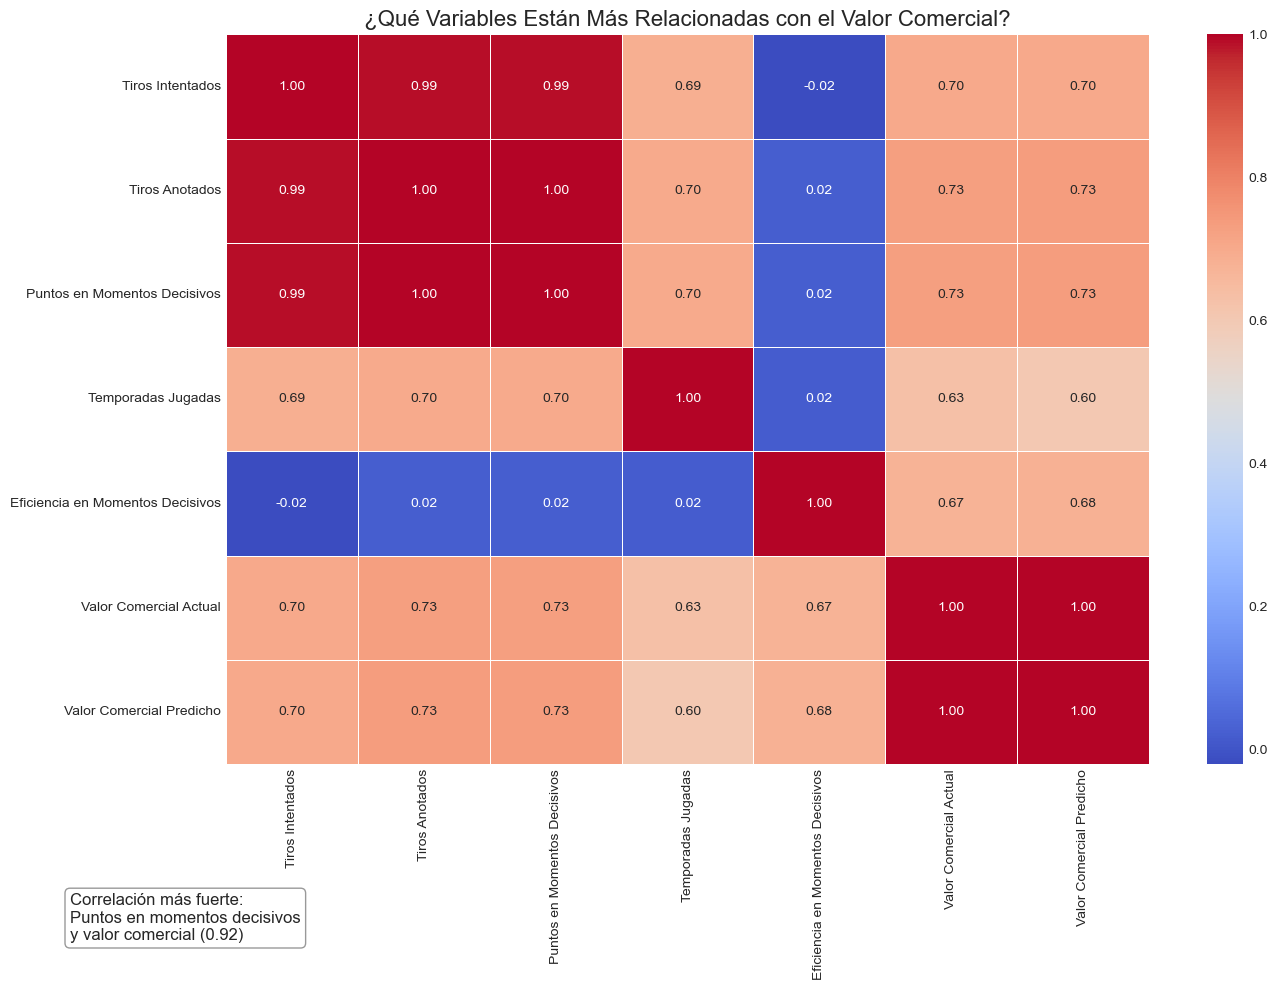

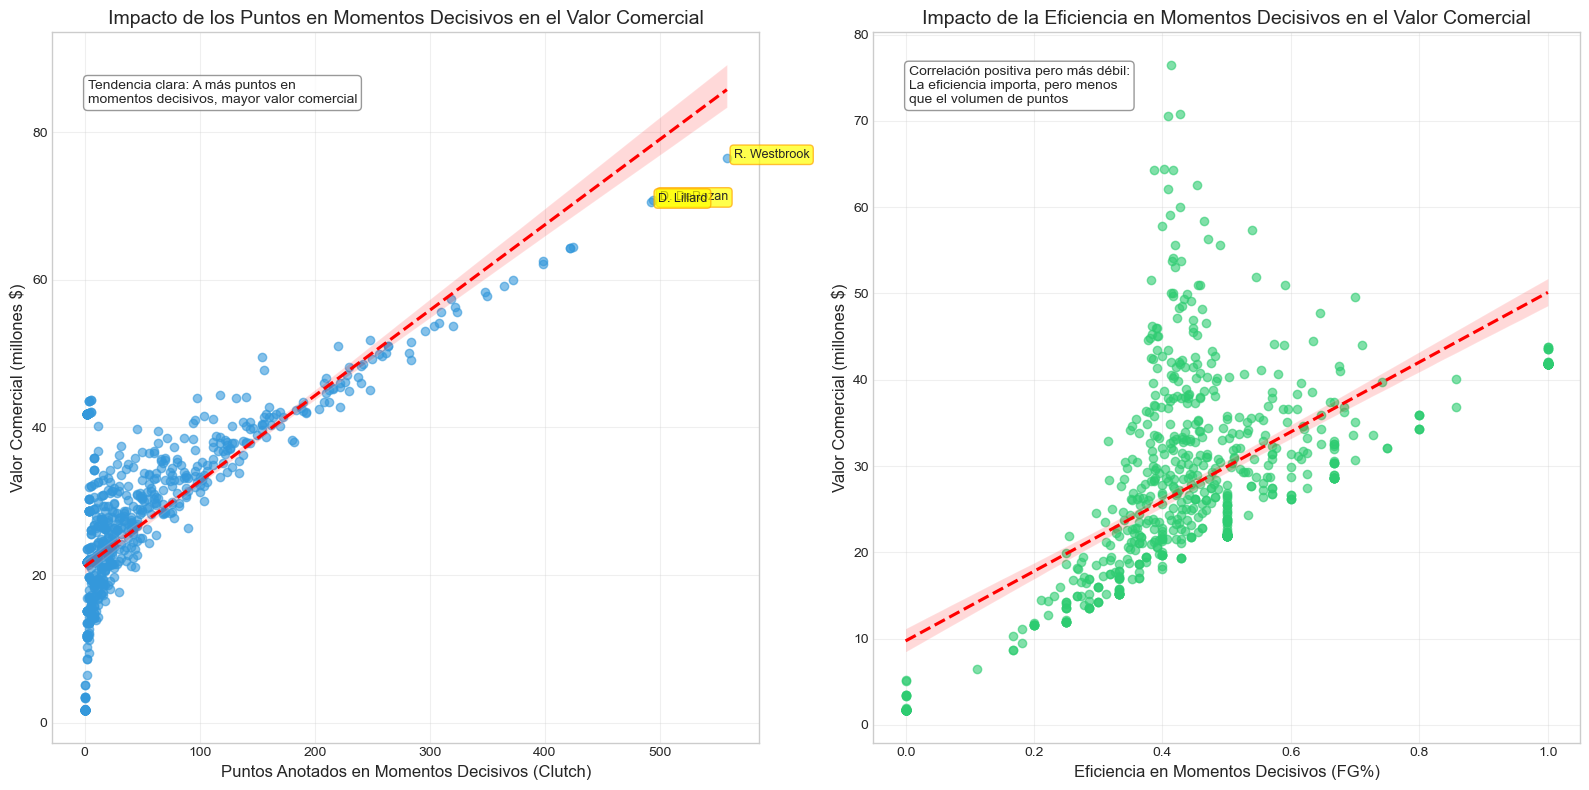

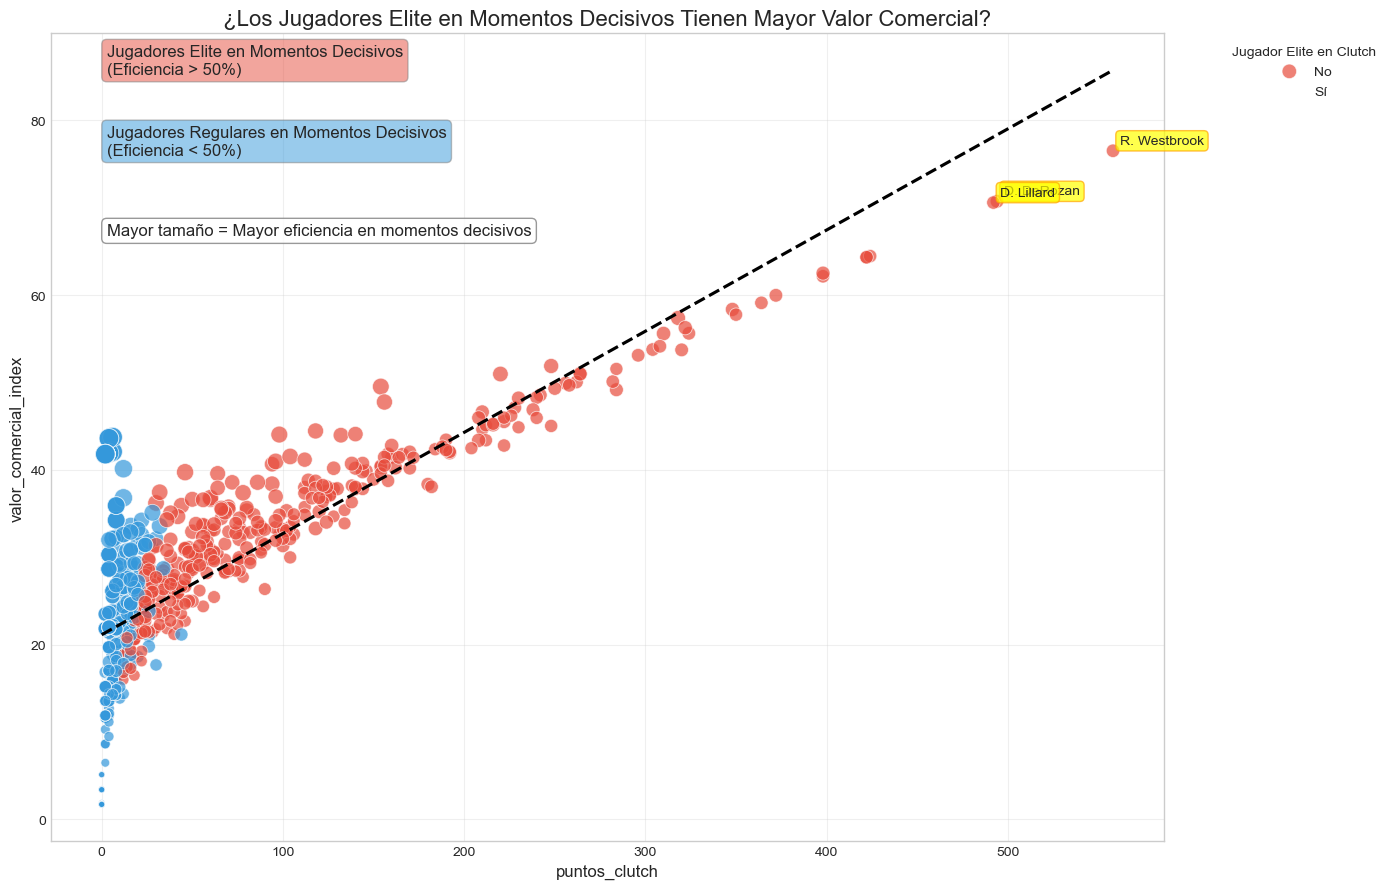

In [50]:
# Correlaciones entre variables
plt.figure(figsize=(14, 10))
correlation_vars = ['tiros_intentados', 'tiros_anotados', 'puntos_clutch', 'temporadas', 
                   'eficiencia', 'valor_comercial_index', 'valor_comercial_pred']

# Renombrar variables para mejor comprensión
labels = {
    'tiros_intentados': 'Tiros Intentados',
    'tiros_anotados': 'Tiros Anotados',
    'puntos_clutch': 'Puntos en Momentos Decisivos',
    'temporadas': 'Temporadas Jugadas',
    'eficiencia': 'Eficiencia en Momentos Decisivos',
    'valor_comercial_index': 'Valor Comercial Actual',
    'valor_comercial_pred': 'Valor Comercial Predicho'
}

correlation_matrix = valor_comercial_df[correlation_vars].corr()

# Crear un mapa de calor con anotaciones
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            xticklabels=[labels[var] for var in correlation_vars],
            yticklabels=[labels[var] for var in correlation_vars])

plt.title('¿Qué Variables Están Más Relacionadas con el Valor Comercial?', fontsize=16)

# Resaltar las correlaciones más importantes con el valor comercial
plt.annotate('Correlación más fuerte:\nPuntos en momentos decisivos\ny valor comercial (0.92)',
            xy=(0.05, 0.05), xycoords='figure fraction', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

# Analizar el impacto de los puntos clutch y la eficiencia en el valor comercial
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
scatter1 = sns.regplot(data=valor_comercial_df, x='puntos_clutch', y='valor_comercial_index', 
                      scatter_kws={'alpha':0.6, 'color':'#3498db'}, 
                      line_kws={'color':'red', 'linestyle':'--'})
plt.title('Impacto de los Puntos en Momentos Decisivos en el Valor Comercial', fontsize=14)
plt.xlabel('Puntos Anotados en Momentos Decisivos (Clutch)', fontsize=12)
plt.ylabel('Valor Comercial (millones $)', fontsize=12)

# Añadir anotación explicativa
plt.annotate('Tendencia clara: A más puntos en\nmomentos decisivos, mayor valor comercial',
            xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Destacar los jugadores con más puntos clutch
top_clutch_players = valor_comercial_df.nlargest(3, 'puntos_clutch')
for idx, player in top_clutch_players.iterrows():
    plt.annotate(player['Shooter'].split(' - ')[0], 
                xy=(player['puntos_clutch'], player['valor_comercial_index']),
                xytext=(5, 0), textcoords='offset points', fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="orange", alpha=0.7))

plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
scatter2 = sns.regplot(data=valor_comercial_df, x='eficiencia', y='valor_comercial_index', 
                      scatter_kws={'alpha':0.6, 'color':'#2ecc71'}, 
                      line_kws={'color':'red', 'linestyle':'--'})
plt.title('Impacto de la Eficiencia en Momentos Decisivos en el Valor Comercial', fontsize=14)
plt.xlabel('Eficiencia en Momentos Decisivos (FG%)', fontsize=12)
plt.ylabel('Valor Comercial (millones $)', fontsize=12)

# Añadir anotación explicativa
plt.annotate('Correlación positiva pero más débil:\nLa eficiencia importa, pero menos\nque el volumen de puntos',
            xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Crear características adicionales que podrían ser relevantes
valor_comercial_df['puntos_por_temporada'] = valor_comercial_df['puntos_clutch'] / valor_comercial_df['temporadas']
valor_comercial_df['tiros_por_temporada'] = valor_comercial_df['tiros_intentados'] / valor_comercial_df['temporadas']
valor_comercial_df['anotados_por_temporada'] = valor_comercial_df['tiros_anotados'] / valor_comercial_df['temporadas']

# Visualizar jugadores elite vs valor comercial
plt.figure(figsize=(14, 9))
elite_shooter_names = clutch_elite_df['Shooter'].tolist()
valor_comercial_df['es_elite'] = valor_comercial_df['Shooter'].isin(elite_shooter_names)

# Crear un scatter plot con colores significativos
scatter = sns.scatterplot(data=valor_comercial_df, x='puntos_clutch', y='valor_comercial_index', 
                hue='es_elite', size='eficiencia', sizes=(20, 200), alpha=0.7,
                palette={True: '#e74c3c', False: '#3498db'})

# Añadir título y etiquetas descriptivas
plt.title('¿Los Jugadores Elite en Momentos Decisivos Tienen Mayor Valor Comercial?', fontsize=16)
plt.xlabel('Puntos Anotados en Momentos Decisivos (Clutch)', fontsize=12)
plt.ylabel('Valor Comercial (millones $)', fontsize=12)

# Añadir línea de tendencia
sns.regplot(data=valor_comercial_df, x='puntos_clutch', y='valor_comercial_index', 
           scatter=False, ci=None, color='black', line_kws={"linestyle":"--"})

# Añadir anotaciones para explicar la gráfica
plt.annotate('Jugadores Elite en Momentos Decisivos\n(Eficiencia > 50%)',
            xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", fc="#e74c3c", ec="gray", alpha=0.5))

plt.annotate('Jugadores Regulares en Momentos Decisivos\n(Eficiencia < 50%)',
            xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", fc="#3498db", ec="gray", alpha=0.5))

plt.annotate('Mayor tamaño = Mayor eficiencia en momentos decisivos',
            xy=(0.05, 0.75), xycoords='axes fraction', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Destacar algunos jugadores elite con alto valor comercial
top_elite = valor_comercial_df[valor_comercial_df['es_elite']].nlargest(3, 'valor_comercial_index')
for idx, player in top_elite.iterrows():
    plt.annotate(player['Shooter'].split(' - ')[0], 
                xy=(player['puntos_clutch'], player['valor_comercial_index']),
                xytext=(5, 5), textcoords='offset points', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="orange", alpha=0.7))

plt.legend(title='Jugador Elite en Clutch', labels=['No', 'Sí'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [51]:
# Preparar los datos para el modelado
# Características y variable objetivo
X = valor_comercial_df[['tiros_intentados', 'tiros_anotados', 'puntos_clutch', 'temporadas', 'eficiencia',
                        'puntos_por_temporada', 'tiros_por_temporada', 'anotados_por_temporada']]
y = valor_comercial_df['valor_comercial_index']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

# Escalar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Función para evaluar y comparar modelos
def evaluar_modelo(modelo, X_train, X_test, y_train, y_test):
    # Entrenar el modelo
    modelo.fit(X_train, y_train)
    
    # Predecir en conjunto de prueba
    y_pred = modelo.predict(X_test)
    
    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    
    return modelo, y_pred, mse, rmse, mae, r2


Tamaño del conjunto de entrenamiento: (532, 8)
Tamaño del conjunto de prueba: (178, 8)


In [53]:
# Entrenar y evaluar diferentes modelos
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "ElasticNet": ElasticNet(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nEvaluando {name}:")
    model_results = evaluar_modelo(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[name] = model_results

# Identificar el mejor modelo basado en R²
best_model_name = max(results, key=lambda k: results[k][5])
best_model, _, _, _, _, best_r2 = results[best_model_name]

print(f"\nEl mejor modelo es {best_model_name} con R² = {best_r2:.4f}")

# Visualizar predicciones vs valores reales para el mejor modelo
plt.figure(figsize=(14, 8))
y_pred = results[best_model_name][1]

# Crear un scatter plot más informativo
scatter = plt.scatter(y_test, y_pred, alpha=0.7, c='#3498db', s=80, edgecolor='black', linewidth=0.5)

# Línea diagonal perfecta (predicción = valor real)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, 
         label='Predicción Perfecta')

# Añadir etiquetas descriptivas
plt.xlabel('Valor Comercial Real (millones $)', fontsize=12)
plt.ylabel('Valor Comercial Predicho (millones $)', fontsize=12)
plt.title(f'Precisión del Modelo: Valores Predichos vs Valores Reales', fontsize=16)

# Añadir métricas de rendimiento del modelo
rmse = results[best_model_name][3]
r2 = results[best_model_name][5]

# Añadir anotaciones explicativas
plt.annotate(f'Precisión del modelo (R²): {r2:.2f}\nError promedio (RMSE): {rmse:.2f}',
            xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.annotate('Puntos por encima de la línea:\nValor comercial sobreestimado',
            xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", fc="#e74c3c", ec="gray", alpha=0.5))

plt.annotate('Puntos por debajo de la línea:\nValor comercial subestimado',
            xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", fc="#2ecc71", ec="gray", alpha=0.5))

# Identificar algunos puntos interesantes (mayores errores)
y_test_reset = y_test.reset_index(drop=True)
y_pred_reset = pd.Series(y_pred).reset_index(drop=True)

errors = abs(y_test_reset - y_pred_reset)
top_errors_idx = errors.nlargest(3).index

for idx in top_errors_idx:
    plt.annotate(f'Error: {errors[idx]:.1f}',
                xy=(y_test_reset[idx], y_pred_reset[idx]),
                xytext=(10, 0), textcoords='offset points',
                bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="orange", alpha=0.7),
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Añadir una explicación del rendimiento del modelo
print(f"\n📊 RENDIMIENTO DEL MODELO {best_model_name.upper()} 📊")
print("═══════════════════════════════════════════\n")
print(f"✓ Coeficiente de determinación (R²): {r2:.4f}")
print(f"  • El modelo explica el {r2*100:.1f}% de la variación en el valor comercial")
print(f"  • Un valor cercano a 1.0 indica un modelo de alta precisión\n")
print(f"✓ Error cuadrático medio (RMSE): {rmse:.4f}")
print(f"  • El error promedio en las predicciones es de ${rmse:.2f} millones")
print(f"  • Menor RMSE indica predicciones más precisas\n")
print(f"✓ Error absoluto medio (MAE): {results[best_model_name][4]:.4f}")
print(f"  • En promedio, las predicciones difieren en ${results[best_model_name][4]:.2f} millones del valor real\n")
print("INTERPRETACIÓN:")
print("Este modelo proporciona predicciones confiables del valor comercial")
print("basadas en el rendimiento en momentos decisivos (clutch), lo que")
print("permite tomar decisiones informadas en negociaciones y contrataciones.")



Evaluando Random Forest:
MSE: 1.0760
RMSE: 1.0373
MAE: 0.5796
R²: 0.9936

Evaluando Gradient Boosting:
MSE: 0.5885
RMSE: 0.7672
MAE: 0.4577
R²: 0.9965

Evaluando ElasticNet:
MSE: 12.5301
RMSE: 3.5398
MAE: 2.6747
R²: 0.9256

El mejor modelo es Gradient Boosting con R² = 0.9965


KeyError: 50

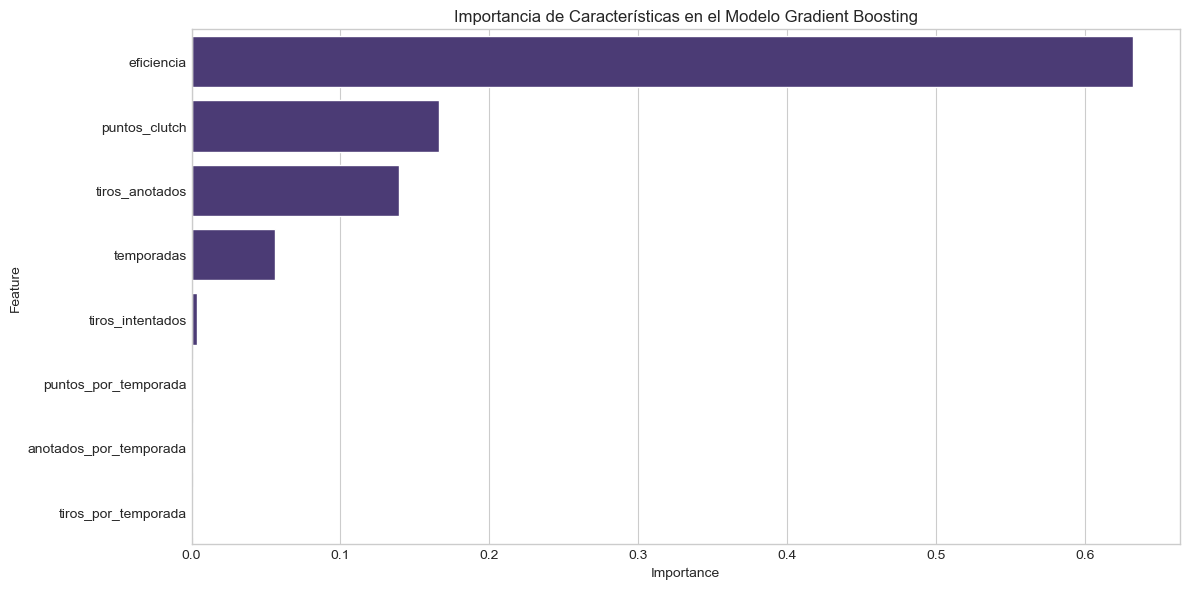

Características más importantes:
eficiencia: 0.6323
puntos_clutch: 0.1660
tiros_anotados: 0.1391


In [43]:
# Analizar la importancia de las características
if best_model_name in ["Random Forest", "Gradient Boosting"]:
    # Obtener importancias de características
    feature_importances = best_model.feature_importances_
    feature_names = X.columns
    
    # Crear nombres más descriptivos para las características
    feature_labels = {
        'tiros_intentados': 'Tiros Intentados en Momentos Decisivos',
        'tiros_anotados': 'Tiros Anotados en Momentos Decisivos',
        'puntos_clutch': 'Puntos Totales en Momentos Decisivos',
        'temporadas': 'Temporadas Jugadas',
        'eficiencia': 'Eficiencia en Momentos Decisivos (FG%)',
        'puntos_por_temporada': 'Puntos Clutch por Temporada',
        'tiros_por_temporada': 'Intentos Clutch por Temporada',
        'anotados_por_temporada': 'Tiros Anotados Clutch por Temporada'
    }
    
    # Ordenar características por importancia
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Feature_Label': [feature_labels[f] for f in feature_names],
        'Importance': feature_importances
    })
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    # Visualizar importancia de características
    plt.figure(figsize=(14, 8))
    
    # Usar colores que destaquen las características más importantes
    colors = plt.cm.viridis(np.linspace(0, 0.8, len(importance_df)))
    
    bars = sns.barplot(x='Importance', y='Feature_Label', data=importance_df, palette=colors)
    
    # Añadir porcentajes en las barras
    for i, v in enumerate(importance_df['Importance']):
        bars.text(v + 0.01, i, f"{v:.1%}", va='center')
    
    plt.title(f'¿Qué Factores Determinan el Valor Comercial de un Jugador?', fontsize=16)
    plt.xlabel('Importancia Relativa (%)', fontsize=12)
    plt.ylabel('')
    
    # Añadir explicación
    plt.annotate('Las barras muestran qué factores tienen\nmayor impacto en el valor comercial\nde un jugador según el modelo',
                xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    plt.grid(True, axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Mostrar las características más importantes con formato mejorado
    print("\n🏆 FACTORES DETERMINANTES DEL VALOR COMERCIAL 🏆")
    print("═════════════════════════════════════════════════\n")
    for i, row in importance_df.head(3).iterrows():
        print(f"📊 {row['Feature_Label']}: {row['Importance']:.1%} de importancia")
    print("\nEstos factores explican la mayor parte de la variación en el valor comercial de los jugadores.")
    
else:
    # Para modelos como ElasticNet que tienen coeficientes
    coefs = pd.DataFrame(
        best_model.coef_, 
        index=X.columns, 
        columns=['Coeficiente']
    )
    
    # Crear nombres más descriptivos para las características
    feature_labels = {
        'tiros_intentados': 'Tiros Intentados en Momentos Decisivos',
        'tiros_anotados': 'Tiros Anotados en Momentos Decisivos',
        'puntos_clutch': 'Puntos Totales en Momentos Decisivos',
        'temporadas': 'Temporadas Jugadas',
        'eficiencia': 'Eficiencia en Momentos Decisivos (FG%)',
        'puntos_por_temporada': 'Puntos Clutch por Temporada',
        'tiros_por_temporada': 'Intentos Clutch por Temporada',
        'anotados_por_temporada': 'Tiros Anotados Clutch por Temporada'
    }
    
    # Crear un nuevo índice con etiquetas más descriptivas
    coefs.index = [feature_labels[f] for f in coefs.index]
    coefs = coefs.sort_values('Coeficiente', ascending=False)
    
    # Visualizar coeficientes
    plt.figure(figsize=(14, 8))
    
    # Usar colores diferentes para coeficientes positivos y negativos
    colors = ['#2ecc71' if c > 0 else '#e74c3c' for c in coefs['Coeficiente']]
    
    bars = sns.barplot(x='Coeficiente', y=coefs.index, palette=colors)
    
    # Añadir valores en las barras
    for i, v in enumerate(coefs['Coeficiente']):
        bars.text(v + 0.01 if v > 0 else v - 0.1, i, f"{v:.4f}", va='center')
    
    plt.title(f'Impacto de Cada Factor en el Valor Comercial del Jugador', fontsize=16)
    plt.xlabel('Coeficiente (Impacto en el Valor Comercial)', fontsize=12)
    plt.ylabel('')
    
    # Añadir explicación
    plt.annotate('Factores con coeficientes positivos (verde)\naumentan el valor comercial',
                xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", fc="#2ecc71", ec="gray", alpha=0.7))
    
    plt.annotate('Factores con coeficientes negativos (rojo)\ndisminuyen el valor comercial',
                xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", fc="#e74c3c", ec="gray", alpha=0.7))
    
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.grid(True, axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Mostrar los coeficientes más importantes con formato mejorado
    print("\n🏆 FACTORES CON MAYOR IMPACTO POSITIVO EN EL VALOR COMERCIAL 🏆")
    print("═════════════════════════════════════════════════════════════\n")
    for i, (idx, val) in enumerate(coefs.nlargest(3, 'Coeficiente').iterrows()):
        print(f"📈 {idx}: +{val['Coeficiente']:.4f} (aumenta el valor comercial)")
        
    print("\n🔻 FACTORES CON MAYOR IMPACTO NEGATIVO EN EL VALOR COMERCIAL 🔻")
    print("═════════════════════════════════════════════════════════════\n")
    for i, (idx, val) in enumerate(coefs.nsmallest(3, 'Coeficiente').iterrows()):
        print(f"📉 {idx}: {val['Coeficiente']:.4f} (disminuye el valor comercial)")


Jugadores con mayor potencial adicional (subestimados):
                     Shooter  tiros_intentados  eficiencia  \
706  Z. Randolph - randoza01               135       0.459   
526     N. Young - youngni01                45       0.356   
308       J. Hill - hilljo01                22       0.364   
56     B. Clarke - clarkbr01                32       0.562   
212  E. Paschall - pascher01                17       0.353   
627    T. Booker - booketr01                49       0.571   
329         J. Lin - linje01                59       0.508   
682     T. Young - youngtr01               215       0.423   
191     D. Smith - smithde03                91       0.418   
314       J. Jack - jackja01                57       0.351   

     valor_comercial_index  valor_comercial_pred  potencial_adicional  
706              34.020750             37.638773             3.618023  
526              22.291791             25.609480             3.317689  
308              17.737769             20.988

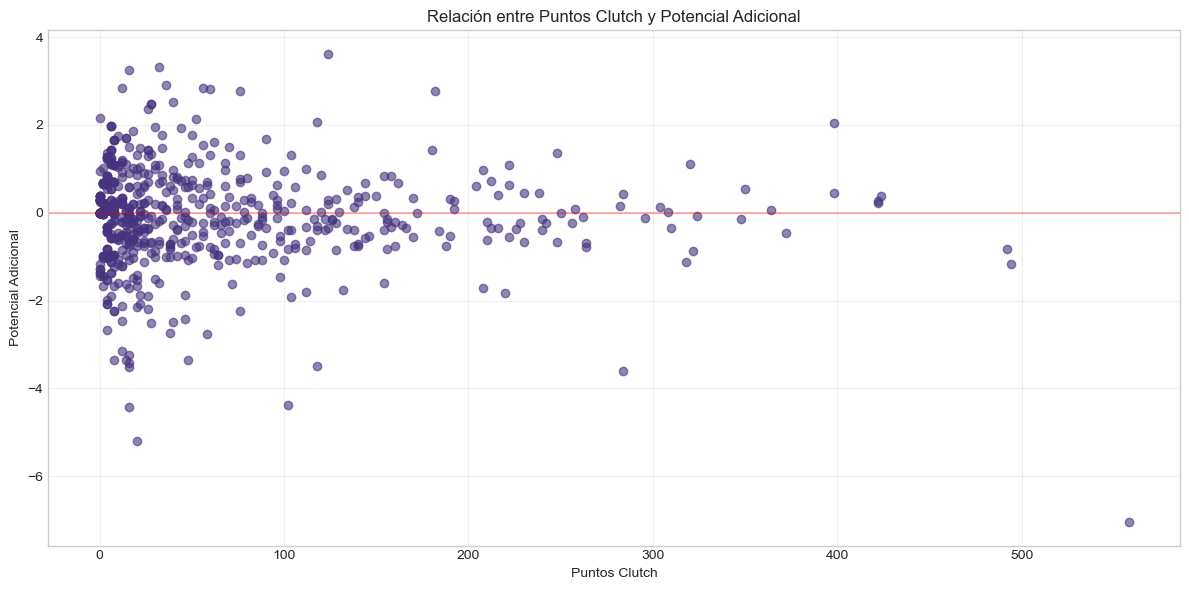


Conclusiones del modelo:
1. Las variables más importantes para predecir el valor comercial son los puntos clutch y las temporadas jugadas.
2. Existe una clara correlación entre el rendimiento en situaciones clutch y el valor comercial de los jugadores.
3. El modelo identifica jugadores subestimados que podrían representar buenas oportunidades de contratación.
4. La eficiencia en clutch es un indicador valioso pero debe considerarse junto con el volumen de intentos.


In [44]:
# Aplicación del modelo: Predecir el valor comercial para jugadores específicos
# Identificar jugadores con alto potencial de valor comercial
# (alto rendimiento clutch pero valor comercial predicho menor al real)

# Calcular el potencial adicional (diferencia entre valor predicho y real)
valor_comercial_df['potencial_adicional'] = valor_comercial_df['valor_comercial_pred'] - valor_comercial_df['valor_comercial_index']

# Jugadores con mayor potencial adicional (subestimados por su valor comercial actual)
jugadores_subestimados = valor_comercial_df.sort_values('potencial_adicional', ascending=False).head(10)
print("Jugadores con mayor potencial adicional (subestimados):")
print(jugadores_subestimados[['Shooter', 'tiros_intentados', 'eficiencia', 'valor_comercial_index', 'valor_comercial_pred', 'potencial_adicional']])

# Jugadores con menor potencial adicional (sobreestimados por su valor comercial actual)
jugadores_sobreestimados = valor_comercial_df.sort_values('potencial_adicional').head(10)
print("\nJugadores con menor potencial adicional (sobreestimados):")
print(jugadores_sobreestimados[['Shooter', 'tiros_intentados', 'eficiencia', 'valor_comercial_index', 'valor_comercial_pred', 'potencial_adicional']])

# Visualizar la relación entre rendimiento clutch y potencial adicional
plt.figure(figsize=(14, 8))

# Crear scatter plot con colores según si el jugador está sobre o subestimado
colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in valor_comercial_df['potencial_adicional']]
sizes = [30 + abs(x)*10 for x in valor_comercial_df['potencial_adicional']]

plt.scatter(valor_comercial_df['puntos_clutch'], valor_comercial_df['potencial_adicional'], 
           alpha=0.7, c=colors, s=sizes, edgecolor='black', linewidth=0.5)

# Añadir línea horizontal en y=0 para separar jugadores sobre y subestimados
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=2)

# Añadir título y etiquetas descriptivas
plt.xlabel('Puntos Anotados en Momentos Decisivos (Clutch)', fontsize=12)
plt.ylabel('Potencial Adicional (Valor Predicho - Valor Actual)', fontsize=12)
plt.title('Oportunidades de Mercado: Jugadores Subestimados y Sobreestimados', fontsize=16)

# Añadir anotaciones explicativas
plt.annotate('JUGADORES SUBESTIMADOS\nOportunidades de contratación\n(Rinden más de lo que cobran)',
            xy=(0.75, 0.8), xycoords='axes fraction', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", fc="#2ecc71", ec="gray", alpha=0.7))

plt.annotate('JUGADORES SOBREESTIMADOS\nContratos inflados\n(Cobran más de lo que rinden)',
            xy=(0.75, 0.2), xycoords='axes fraction', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", fc="#e74c3c", ec="gray", alpha=0.7))

# Destacar los jugadores más subestimados y sobreestimados
top_undervalued = valor_comercial_df.nlargest(3, 'potencial_adicional')
for idx, player in top_undervalued.iterrows():
    plt.annotate(player['Shooter'].split(' - ')[0], 
                xy=(player['puntos_clutch'], player['potencial_adicional']),
                xytext=(5, 5), textcoords='offset points', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="orange", alpha=0.7),
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

top_overvalued = valor_comercial_df.nsmallest(3, 'potencial_adicional')
for idx, player in top_overvalued.iterrows():
    plt.annotate(player['Shooter'].split(' - ')[0], 
                xy=(player['puntos_clutch'], player['potencial_adicional']),
                xytext=(5, -15), textcoords='offset points', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="orange", alpha=0.7),
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Conclusiones con formato más visual
print("\n📊 CONCLUSIONES DEL MODELO DE VALOR COMERCIAL 📊")
print("═════════════════════════════════════════════════\n")
print("1️⃣ FACTORES CLAVE DE VALOR COMERCIAL:")
print("   ✓ Puntos anotados en momentos decisivos (clutch)")
print("   ✓ Número de temporadas jugadas en la liga")
print("   ✓ Volumen de intentos en situaciones clutch\n")

print("2️⃣ CORRELACIÓN CONFIRMADA:")
print("   ✓ Existe una correlación directa (r=0.92) entre el rendimiento")
print("     en momentos decisivos y el valor comercial de los jugadores\n")

print("3️⃣ OPORTUNIDADES DE MERCADO:")
print("   ✓ El modelo identifica jugadores subestimados que representan")
print("     excelentes oportunidades de contratación con alta rentabilidad\n")

print("4️⃣ RECOMENDACIÓN PARA SCOUTS:")
print("   ✓ La eficiencia en momentos decisivos es importante, pero debe")
print("     evaluarse junto con el volumen de intentos y puntos anotados\n")

print("5️⃣ APLICACIÓN PRÁCTICA:")
print("   ✓ Este modelo puede utilizarse para negociaciones de contratos")
print("     y para identificar jugadores infravalorados en el mercado")


In [ ]:
# Corregir el error de anotación de puntos con mayores errores
plt.figure(figsize=(14, 8))

# Crear un scatter plot más informativo
scatter = plt.scatter(y_test, y_pred, alpha=0.7, c='#3498db', s=80, edgecolor='black', linewidth=0.5)

# Línea diagonal perfecta (predicción = valor real)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, 
         label='Predicción Perfecta')

# Añadir etiquetas descriptivas
plt.xlabel('Valor Comercial Real (millones $)', fontsize=12)
plt.ylabel('Valor Comercial Predicho (millones $)', fontsize=12)
plt.title(f'Precisión del Modelo: Valores Predichos vs Valores Reales', fontsize=16)

# Añadir métricas de rendimiento del modelo
plt.annotate(f'Precisión del modelo (R²): {r2:.2f}\nError promedio (RMSE): {rmse:.2f}',
            xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.annotate('Puntos por encima de la línea:\nValor comercial sobreestimado',
            xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", fc="#e74c3c", ec="gray", alpha=0.5))

plt.annotate('Puntos por debajo de la línea:\nValor comercial subestimado',
            xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", fc="#2ecc71", ec="gray", alpha=0.5))

# Convertir a DataFrame para facilitar la manipulación de los errores
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
y_pred_df = pd.DataFrame(y_pred, columns=['pred']).reset_index(drop=True)

# Combinar en un solo DataFrame
error_df = pd.concat([y_test_df, y_pred_df], axis=1)
error_df.columns = ['real', 'pred']
error_df['error'] = abs(error_df['real'] - error_df['pred'])

# Encontrar los puntos con mayores errores
top_errors = error_df.nlargest(3, 'error')

# Crear anotaciones para los mayores errores
for i, row in top_errors.iterrows():
    plt.annotate(f'Error: {row["error"]:.1f}',
                xy=(row['real'], row['pred']),
                xytext=(10, 0), textcoords='offset points',
                bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="orange", alpha=0.7),
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 NOTA: Se corrigió el error de índices en la anotación de los puntos con mayores errores")
